## NFL ANN Model
### Ryan Slipe
### Grand Canyon University
### DSC-550-O500
### 10/19/2023

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Draft

In [2]:
# import draft data
draft = pd.read_csv("C:/Users/ryans/Documents/Neural Netwoks-Deep Learning/NFL_data/draft.csv")

In [3]:
draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   playerId          12140 non-null  int64  
 1   draft             12140 non-null  int64  
 2   round             11879 non-null  float64
 3   pick              12140 non-null  int64  
 4   draftTradeValue   12140 non-null  float64
 5   draftTeam         12140 non-null  object 
 6   position          12140 non-null  object 
 7   teamId            12140 non-null  int64  
 8   nameFirst         12140 non-null  object 
 9   nameLast          12140 non-null  object 
 10  nameFull          12140 non-null  object 
 11  collegeId         12140 non-null  int64  
 12  nflId             10889 non-null  float64
 13  combineId         6693 non-null   float64
 14  college           12140 non-null  object 
 15  heightInches      9554 non-null   float64
 16  weight            9554 non-null   float6

In [4]:
# drop columns we will not be using
draft.drop(['round', 'pick', 'draftTradeValue', 'draftTeam',
       'teamId', 'nameFirst', 'nameLast', 'collegeId',
       'nflId', 'combineId', 'college', 'heightInches', 'weight', 'playerProfileUrl', 'homeCity', 'homeState',
       'homeCountry', 'highSchool', 'hsCity', 'hsState', 'hsCountry'], axis = 1, inplace = True)

In [5]:
# glipse of data
draft.head()

playerId  draft position       nameFull         dob  ageAtDraft
0  19770001   1977       RB     Ricky Bell  1955-04-08   22.084932
1  19770002   1977       RB   Tony Dorsett  1954-04-07   23.087671
2  19770003   1977       DE  Eddie Edwards  1954-04-25   23.038356
3  19770004   1977       OT  Marvin Powell  1955-08-30   21.690411
4  19770005   1977       DE     Gary Jeter  1955-01-24   22.287671

In [6]:
# create age column
from datetime import datetime, date
# convert birth date to datetime format
# change data type to date
draft['dob'] = pd.to_datetime(draft['dob'])

In [7]:
# drop na for calculations
draft.dropna(inplace = True)

# calculate age
draft['Age'] = (pd.Timestamp('now') - draft['dob'])/np.timedelta64(1, 'Y')
draft['Age'] = draft['Age'].astype(int)

In [8]:
# drop columns 
draft.drop(['draft', 'dob', 'ageAtDraft'], axis = 1, inplace = True)

In [9]:
# view dataframe
draft.head()

playerId position       nameFull  Age
0  19770001       RB     Ricky Bell   68
1  19770002       RB   Tony Dorsett   69
2  19770003       DE  Eddie Edwards   69
3  19770004       OT  Marvin Powell   68
4  19770005       DE     Gary Jeter   68

### Combine

In [10]:
combine = pd.read_csv("C:/Users/ryans/Documents/Neural Netwoks-Deep Learning/NFL_data/combine.csv")

In [11]:
# drop na
combine.dropna(subset = ['dob'], axis = 0, inplace = True)

In [12]:
combine.columns

Index(['combineId', 'playerId', 'combineYear', 'combinePosition',
       'combineHeight', 'combineWeight', 'combineHand', 'nameFirst',
       'nameLast', 'nameFull', 'position', 'collegeId', 'nflId', 'college',
       'heightInches', 'weight', 'dob', 'ageAtDraft', 'playerProfileUrl',
       'homeCity', 'homeState', 'homeCountry', 'highSchool', 'hsCity',
       'hsState', 'hsCountry', 'combineArm', 'combine40yd', 'combineVert',
       'combineBench', 'combineShuttle', 'combineBroad', 'combine3cone',
       'combine60ydShuttle', 'combineWonderlic'],
      dtype='object')

In [13]:
# remove unwanted columns and add age
combine.drop(['combineId', 'combineYear', 'combinePosition', 'combineHeight', 'combineWeight', 'combineHand', 'nameFirst',
       'nameLast',  'collegeId', 'nflId', 'college', 'ageAtDraft', 'playerProfileUrl',
       'homeCity', 'homeState', 'homeCountry', 'highSchool', 'hsCity',
       'hsState', 'hsCountry', 'combineArm', 'combine40yd', 'combineVert',
       'combineBench', 'combineShuttle', 'combineBroad', 'combine3cone',
       'combine60ydShuttle', 'combineWonderlic',
       'heightInches', 'weight'
              ], axis = 1, inplace = True)

# add age column
# change data type to date
combine['dob'] = pd.to_datetime(combine['dob'])

# calculate age
combine['Age'] = (pd.Timestamp('now') - combine['dob'])/np.timedelta64(1, 'Y')
combine['Age'] = combine['Age'].astype(int)

In [14]:
combine.head()

playerId         nameFull position        dob  Age
0  19870067    Michael Adams       DB 1964-04-05   59
1  19870154     John Adickes        C 1964-06-29   59
3  19870121  David Alexander        C 1964-07-28   59
4  19870801    Lyneal Alston       WR 1964-07-23   59
5  19870201     Steve Alvord       DT 1964-10-02   59

### Players

In [15]:
# import players
players = pd.read_csv("C:/Users/ryans/Documents/Neural Netwoks-Deep Learning/NFL_data/players.csv")

In [16]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23295 entries, 0 to 23294
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   playerId          23295 non-null  int64  
 1   nameFirst         23295 non-null  object 
 2   nameLast          23295 non-null  object 
 3   nameFull          23295 non-null  object 
 4   position          23294 non-null  object 
 5   collegeId         23295 non-null  int64  
 6   nflId             20959 non-null  object 
 7   combineId         10097 non-null  float64
 8   college           23295 non-null  object 
 9   heightInches      20709 non-null  float64
 10  weight            20709 non-null  float64
 11  dob               20226 non-null  object 
 12  ageAtDraft        20226 non-null  float64
 13  playerProfileUrl  20959 non-null  object 
 14  homeCity          15618 non-null  object 
 15  homeState         15231 non-null  object 
 16  homeCountry       15715 non-null  object

In [17]:
# drop the NA instances for dob since we need age
players.dropna(subset = ['dob'], axis = 0, inplace = True)

In [18]:
# check info again
players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20226 entries, 0 to 23294
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   playerId          20226 non-null  int64  
 1   nameFirst         20226 non-null  object 
 2   nameLast          20226 non-null  object 
 3   nameFull          20226 non-null  object 
 4   position          20225 non-null  object 
 5   collegeId         20226 non-null  int64  
 6   nflId             20223 non-null  object 
 7   combineId         8510 non-null   float64
 8   college           20226 non-null  object 
 9   heightInches      18897 non-null  float64
 10  weight            18897 non-null  float64
 11  dob               20226 non-null  object 
 12  ageAtDraft        20226 non-null  float64
 13  playerProfileUrl  20223 non-null  object 
 14  homeCity          15558 non-null  object 
 15  homeState         15174 non-null  object 
 16  homeCountry       15655 non-null  object 
 17

In [19]:
# remove unwanted columns and add age
players.drop(['nameFirst', 'nameLast', 'collegeId', 'nflId', 'combineId', 'college', 'heightInches',
             'weight', 'ageAtDraft', 'playerProfileUrl', 'homeCity', 'homeState', 'homeCountry', 'highSchool',
             'hsCity', 'hsState', 'hsCountry'], axis = 1, inplace = True)

# add age column
# change data type to date
players['dob'] = pd.to_datetime(players['dob'])

# calculate age
players['Age'] = (pd.Timestamp('now') - players['dob'])/np.timedelta64(1, 'Y')
players['Age'] = players['Age'].astype(int)

In [20]:
# drop dob column
players.drop('dob', axis = 1, inplace = True)

In [21]:
# view head
players.head()

playerId       nameFull position  Age
0  19770001     Ricky Bell       RB   68
1  19770002   Tony Dorsett       RB   69
2  19770003  Eddie Edwards       DE   69
3  19770004  Marvin Powell       OT   68
4  19770005     Gary Jeter       DE   68

In [22]:
# describe
players.describe()

playerId           Age
count  2.022600e+04  20226.000000
mean   2.003571e+07     42.329131
std    1.124453e+05     11.184237
min    1.977000e+07     24.000000
25%    1.995024e+07     33.000000
50%    2.006006e+07     40.000000
75%    2.013048e+07     51.000000
max    2.019120e+07     75.000000

### Combine the Draft, Players, and Combine Dataframes

In [23]:
# merge
players = pd.merge(players, draft, on = 'playerId', how = 'left')

In [24]:
players.drop(['Age_y', 'nameFull_y', 'position_y'], axis = 1, inplace = True)

In [25]:
players.head()

playerId     nameFull_x position_x  Age_x
0  19770001     Ricky Bell         RB     68
1  19770002   Tony Dorsett         RB     69
2  19770003  Eddie Edwards         DE     69
3  19770004  Marvin Powell         OT     68
4  19770005     Gary Jeter         DE     68

In [26]:
players.columns = ['playerId', 'nameFull', 'position', 'age']

In [27]:
players.head()

playerId       nameFull position  age
0  19770001     Ricky Bell       RB   68
1  19770002   Tony Dorsett       RB   69
2  19770003  Eddie Edwards       DE   69
3  19770004  Marvin Powell       OT   68
4  19770005     Gary Jeter       DE   68

In [28]:
players.tail()

playerId        nameFull position  age
20389  20191194  Fisayo Awolaja       OG   27
20390  20191195    Quart'e Sapp       LB   26
20391  20191196     Kirk Barron        C   28
20392  20191198  Jordan Holland       DB   28
20393  20191200   Tavonn Salter       WR   27

In [29]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   playerId  20394 non-null  int64 
 1   nameFull  20394 non-null  object
 2   position  20393 non-null  object
 3   age       20394 non-null  int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 557.8+ KB


In [30]:
# drop duplicates
players = players.drop_duplicates()

In [31]:
# merge players with combine
players = pd.merge(players, combine, on = 'playerId', how = 'left')

In [32]:
players.head()

playerId     nameFull_x position_x  age nameFull_y position_y dob  Age
0  19770001     Ricky Bell         RB   68        NaN        NaN NaT  NaN
1  19770002   Tony Dorsett         RB   69        NaN        NaN NaT  NaN
2  19770003  Eddie Edwards         DE   69        NaN        NaN NaT  NaN
3  19770004  Marvin Powell         OT   68        NaN        NaN NaT  NaN
4  19770005     Gary Jeter         DE   68        NaN        NaN NaT  NaN

In [33]:
players.drop(['Age', 'nameFull_y', 'position_y', 'dob'], axis = 1, inplace = True)

In [34]:
players.head()

playerId     nameFull_x position_x  age
0  19770001     Ricky Bell         RB   68
1  19770002   Tony Dorsett         RB   69
2  19770003  Eddie Edwards         DE   69
3  19770004  Marvin Powell         OT   68
4  19770005     Gary Jeter         DE   68

In [35]:
players.columns = ['playerId', 'nameFull', 'position', 'age']

In [36]:
players

playerId        nameFull position  age
0      19770001      Ricky Bell       RB   68
1      19770002    Tony Dorsett       RB   69
2      19770003   Eddie Edwards       DE   69
3      19770004   Marvin Powell       OT   68
4      19770005      Gary Jeter       DE   68
...         ...             ...      ...  ...
20195  20191194  Fisayo Awolaja       OG   27
20196  20191195    Quart'e Sapp       LB   26
20197  20191196     Kirk Barron        C   28
20198  20191198  Jordan Holland       DB   28
20199  20191200   Tavonn Salter       WR   27

[20200 rows x 4 columns]

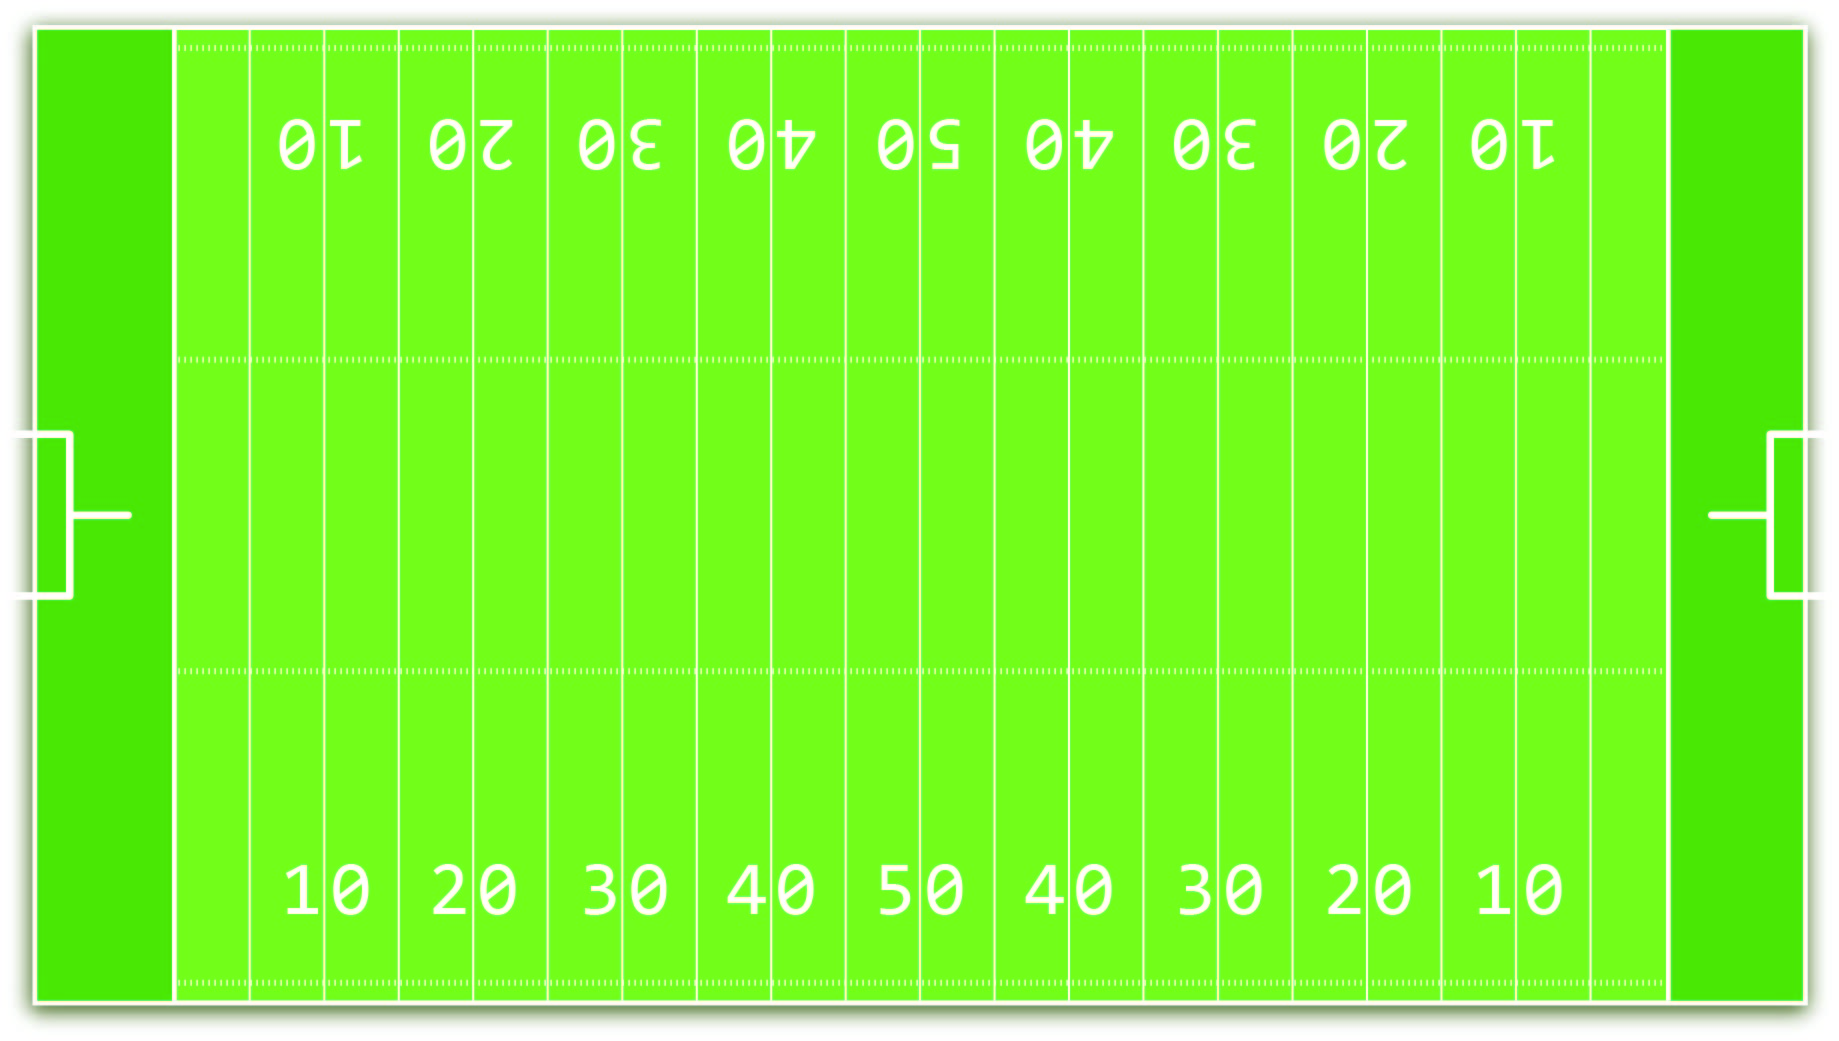

## Building the Defense

In order to build an optimal defense we will have to do some formatting of our 20+ csv files to get all of the defensive players and statistics in one dataframe. The defense will consist of tackles, passes deflected, sacks, interceptions and qb hits.

### Tackles

In [37]:
# import file
tackles = pd.read_csv("C:/Users/ryans/Documents/Neural Netwoks-Deep Learning/NFL_data/tackles.csv")

In [38]:
# remove unwanted columns
tackles.drop(['tackleId', 'playId', 'teamId', 'tacklePosition', 'tackleYdsScrim', 'tackleEnd', 'tackleNull'],
            axis = 1, inplace= True)

In [39]:
# what kind of tackles are there
tackles['tackleType'].value_counts()

tackleType
solo          419631
assist        228712
for a loss     77951
Name: count, dtype: int64

I would like to group the tackles by playerId and sum them up together so that we can see which players made the most tackles. In football statistics it is popular to count a solo tackle as 1 and an assisted tackle as 0.5. A tackle for a loss is counted as one but a tackle for a loss should be given more credit since it increases the chances of the defense getting off the field. This is even more important for a player like a DT who will not get the amount of sacks that a DE will get, but may have more tackles for a loss which shows their dominance in the run game. For this reason, I will count a tackle for a loss as 1.25 tackles. 

In [40]:
# numeric expression of tackle type
tackles['tackleType'].replace({'solo': 1, 'assist': 0.5, 'for a loss': 1.25}, inplace = True)

In [41]:
# aggregate the tackles based on player id
df_tackles = tackles.groupby(['playerId']).agg({'tackleType': 'sum'})

In [42]:
# glimpse of the data
df_tackles.describe()

tackleType
count  7834.000000
mean     80.600683
std     149.381939
min       0.500000
25%       5.500000
50%      17.000000
75%      77.187500
max    1314.750000

In [43]:
# merge with players - name it defense
defense = pd.merge(players, df_tackles, on = 'playerId', how = 'left')

In [44]:
# view players 
defense.head()

playerId       nameFull position  age  tackleType
0  19770001     Ricky Bell       RB   68         NaN
1  19770002   Tony Dorsett       RB   69         NaN
2  19770003  Eddie Edwards       DE   69         NaN
3  19770004  Marvin Powell       OT   68         NaN
4  19770005     Gary Jeter       DE   68         NaN

In [45]:
defense.tail()

playerId        nameFull position  age  tackleType
20195  20191194  Fisayo Awolaja       OG   27         NaN
20196  20191195    Quart'e Sapp       LB   26         6.5
20197  20191196     Kirk Barron        C   28         NaN
20198  20191198  Jordan Holland       DB   28         2.0
20199  20191200   Tavonn Salter       WR   27         NaN

In [46]:
defense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20200 entries, 0 to 20199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   playerId    20200 non-null  int64  
 1   nameFull    20200 non-null  object 
 2   position    20199 non-null  object 
 3   age         20200 non-null  int32  
 4   tackleType  7740 non-null   float64
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 710.3+ KB


In [47]:
# drop duplicates
defense.drop_duplicates(inplace = True)

In [48]:
defense

playerId        nameFull position  age  tackleType
0      19770001      Ricky Bell       RB   68         NaN
1      19770002    Tony Dorsett       RB   69         NaN
2      19770003   Eddie Edwards       DE   69         NaN
3      19770004   Marvin Powell       OT   68         NaN
4      19770005      Gary Jeter       DE   68         NaN
...         ...             ...      ...  ...         ...
20195  20191194  Fisayo Awolaja       OG   27         NaN
20196  20191195    Quart'e Sapp       LB   26         6.5
20197  20191196     Kirk Barron        C   28         NaN
20198  20191198  Jordan Holland       DB   28         2.0
20199  20191200   Tavonn Salter       WR   27         NaN

[20198 rows x 5 columns]

### PassDef

For passes deflected we will sum each playerId with the number of passes that they deflected.

In [49]:
# import data
passDef = pd.read_csv("C:/Users/ryans/Documents/Neural Netwoks-Deep Learning/NFL_data/passDef.csv")

In [50]:
# view head
passDef.head()

passDefId  playId  teamId  playerId passDefPosition  passDefNull
0     520001      10    3800  20010064               S            0
1     520002      14    3800  20010064               S            0
2     520003      18    3200  20030036              DB            0
3     520004      36    3200  20030036              DB            0
4     520005      46    3200  19950023              CB            0

In [51]:
# drop unwanted columns
passDef.drop(['passDefId', 'playId', 'teamId', 'passDefPosition', 'passDefNull'], axis = 1, inplace = True)

In [52]:
# add total column
passDef['passDef'] = 1

In [53]:
# get player totals
df_passDef = passDef.groupby(['playerId']).agg({'passDef': 'sum'})

In [54]:
df_passDef.head()

passDef
playerId         
19890005       10
19890146        1
19900005        7
19910020        1
19910025        3

In [55]:
df_passDef.describe()

passDef
count  3082.000000
mean     15.630110
std      23.418426
min       1.000000
25%       3.000000
50%       6.000000
75%      18.000000
max     208.000000

In [56]:
# merge data frames - add to defense 
defense = pd.merge(defense, df_passDef, on = 'playerId', how = 'left')

In [57]:
defense.head()

playerId       nameFull position  age  tackleType  passDef
0  19770001     Ricky Bell       RB   68         NaN      NaN
1  19770002   Tony Dorsett       RB   69         NaN      NaN
2  19770003  Eddie Edwards       DE   69         NaN      NaN
3  19770004  Marvin Powell       OT   68         NaN      NaN
4  19770005     Gary Jeter       DE   68         NaN      NaN

In [58]:
defense.tail()

playerId        nameFull position  age  tackleType  passDef
20193  20191194  Fisayo Awolaja       OG   27         NaN      NaN
20194  20191195    Quart'e Sapp       LB   26         6.5      NaN
20195  20191196     Kirk Barron        C   28         NaN      NaN
20196  20191198  Jordan Holland       DB   28         2.0      NaN
20197  20191200   Tavonn Salter       WR   27         NaN      NaN

In [59]:
defense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20198 entries, 0 to 20197
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   playerId    20198 non-null  int64  
 1   nameFull    20198 non-null  object 
 2   position    20197 non-null  object 
 3   age         20198 non-null  int32  
 4   tackleType  7738 non-null   float64
 5   passDef     3059 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 868.0+ KB


### Sacks

In [60]:
# import data
sacks = pd.read_csv("C:/Users/ryans/Documents/Neural Netwoks-Deep Learning/NFL_data/sacks.csv")

In [61]:
# what values do we have
sacks['sackType'].value_counts()

sackType
1.0    22534
0.5     3430
Name: count, dtype: int64

In [62]:
# drop unwanted columns
sacks.drop(['sackId', 'playId', 'teamId', 'sackPosition', 'sackYards', 'sackEnd', 'sackNull'], axis = 1, inplace = True)

In [63]:
# sum for each player
df_sacks = sacks.groupby(['playerId']).agg({'sackType': 'sum'})

In [64]:
# glimpse of data
df_sacks.describe()

sackType
count  2314.000000
mean     10.479257
std      17.086559
min       0.500000
25%       2.000000
50%       4.000000
75%      10.500000
max     178.000000

In [65]:
# merge with defense
defense = pd.merge(defense, df_sacks, on = 'playerId', how = 'left')

In [66]:
defense.head()

playerId       nameFull position  age  tackleType  passDef  sackType
0  19770001     Ricky Bell       RB   68         NaN      NaN       NaN
1  19770002   Tony Dorsett       RB   69         NaN      NaN       NaN
2  19770003  Eddie Edwards       DE   69         NaN      NaN       NaN
3  19770004  Marvin Powell       OT   68         NaN      NaN       NaN
4  19770005     Gary Jeter       DE   68         NaN      NaN       NaN

In [67]:
defense.tail()

playerId        nameFull position  age  tackleType  passDef  sackType
20193  20191194  Fisayo Awolaja       OG   27         NaN      NaN       NaN
20194  20191195    Quart'e Sapp       LB   26         6.5      NaN       NaN
20195  20191196     Kirk Barron        C   28         NaN      NaN       NaN
20196  20191198  Jordan Holland       DB   28         2.0      NaN       NaN
20197  20191200   Tavonn Salter       WR   27         NaN      NaN       NaN

### Interceptions

In [68]:
# import data
interceptions = pd.read_csv("C:/Users/ryans/Documents/Neural Netwoks-Deep Learning/NFL_data/interceptions.csv")

In [69]:
# remove unwnated columns
interceptions.drop(['interceptionId', 'playId', 'teamId', 'intPosition', 'intYards',
                    'intTd', 'intNull'], axis = 1, inplace = True)

In [70]:
# get sum
df_interceptions = interceptions.groupby(['playerId']).agg({'int': 'sum'})

In [71]:
# glimpse of data
df_interceptions.describe()

int
count  1492.000000
mean      6.304290
std       7.500049
min       0.000000
25%       2.000000
50%       3.000000
75%       8.000000
max      50.000000

In [72]:
# merge with defense
defense = pd.merge(defense, df_interceptions, on = 'playerId', how = 'left')

In [73]:
defense.head()

playerId       nameFull position  age  tackleType  passDef  sackType  int
0  19770001     Ricky Bell       RB   68         NaN      NaN       NaN  NaN
1  19770002   Tony Dorsett       RB   69         NaN      NaN       NaN  NaN
2  19770003  Eddie Edwards       DE   69         NaN      NaN       NaN  NaN
3  19770004  Marvin Powell       OT   68         NaN      NaN       NaN  NaN
4  19770005     Gary Jeter       DE   68         NaN      NaN       NaN  NaN

In [74]:
defense.tail()

playerId        nameFull position  age  tackleType  passDef  sackType  \
20193  20191194  Fisayo Awolaja       OG   27         NaN      NaN       NaN   
20194  20191195    Quart'e Sapp       LB   26         6.5      NaN       NaN   
20195  20191196     Kirk Barron        C   28         NaN      NaN       NaN   
20196  20191198  Jordan Holland       DB   28         2.0      NaN       NaN   
20197  20191200   Tavonn Salter       WR   27         NaN      NaN       NaN   

       int  
20193  NaN  
20194  NaN  
20195  NaN  
20196  NaN  
20197  NaN

### Qb Hits

In [75]:
# import the data
qbHits = pd.read_csv("C:/Users/ryans/Documents/Neural Netwoks-Deep Learning/NFL_data/qhHits.csv")

In [76]:
# drop unwanted columns
qbHits.drop(['qbHitId', 'playId', 'teamId', 'statNull'], axis = 1, inplace = True)

In [77]:
# each instance is 1 qb hit so add a column
qbHits['qbHit'] = 1

In [78]:
# aggregate
df_qbHits = qbHits.groupby(['playerId']).agg({'qbHit': 'sum'})

In [79]:
# glimpse of data
df_qbHits.describe()

qbHit
count  2777.000000
mean     18.562838
std      33.901457
min       1.000000
25%       3.000000
50%       6.000000
75%      18.000000
max     331.000000

In [80]:
# merge it
defense = pd.merge(defense, df_qbHits, on = 'playerId', how = 'left')

In [81]:
defense.head()

playerId       nameFull position  age  tackleType  passDef  sackType  int  \
0  19770001     Ricky Bell       RB   68         NaN      NaN       NaN  NaN   
1  19770002   Tony Dorsett       RB   69         NaN      NaN       NaN  NaN   
2  19770003  Eddie Edwards       DE   69         NaN      NaN       NaN  NaN   
3  19770004  Marvin Powell       OT   68         NaN      NaN       NaN  NaN   
4  19770005     Gary Jeter       DE   68         NaN      NaN       NaN  NaN   

   qbHit  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN

In [82]:
defense.tail()

playerId        nameFull position  age  tackleType  passDef  sackType  \
20193  20191194  Fisayo Awolaja       OG   27         NaN      NaN       NaN   
20194  20191195    Quart'e Sapp       LB   26         6.5      NaN       NaN   
20195  20191196     Kirk Barron        C   28         NaN      NaN       NaN   
20196  20191198  Jordan Holland       DB   28         2.0      NaN       NaN   
20197  20191200   Tavonn Salter       WR   27         NaN      NaN       NaN   

       int  qbHit  
20193  NaN    NaN  
20194  NaN    NaN  
20195  NaN    NaN  
20196  NaN    NaN  
20197  NaN    NaN

In [83]:
defense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20198 entries, 0 to 20197
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   playerId    20198 non-null  int64  
 1   nameFull    20198 non-null  object 
 2   position    20197 non-null  object 
 3   age         20198 non-null  int32  
 4   tackleType  7738 non-null   float64
 5   passDef     3059 non-null   float64
 6   sackType    2301 non-null   float64
 7   int         1483 non-null   float64
 8   qbHit       2752 non-null   float64
dtypes: float64(5), int32(1), int64(1), object(2)
memory usage: 1.3+ MB


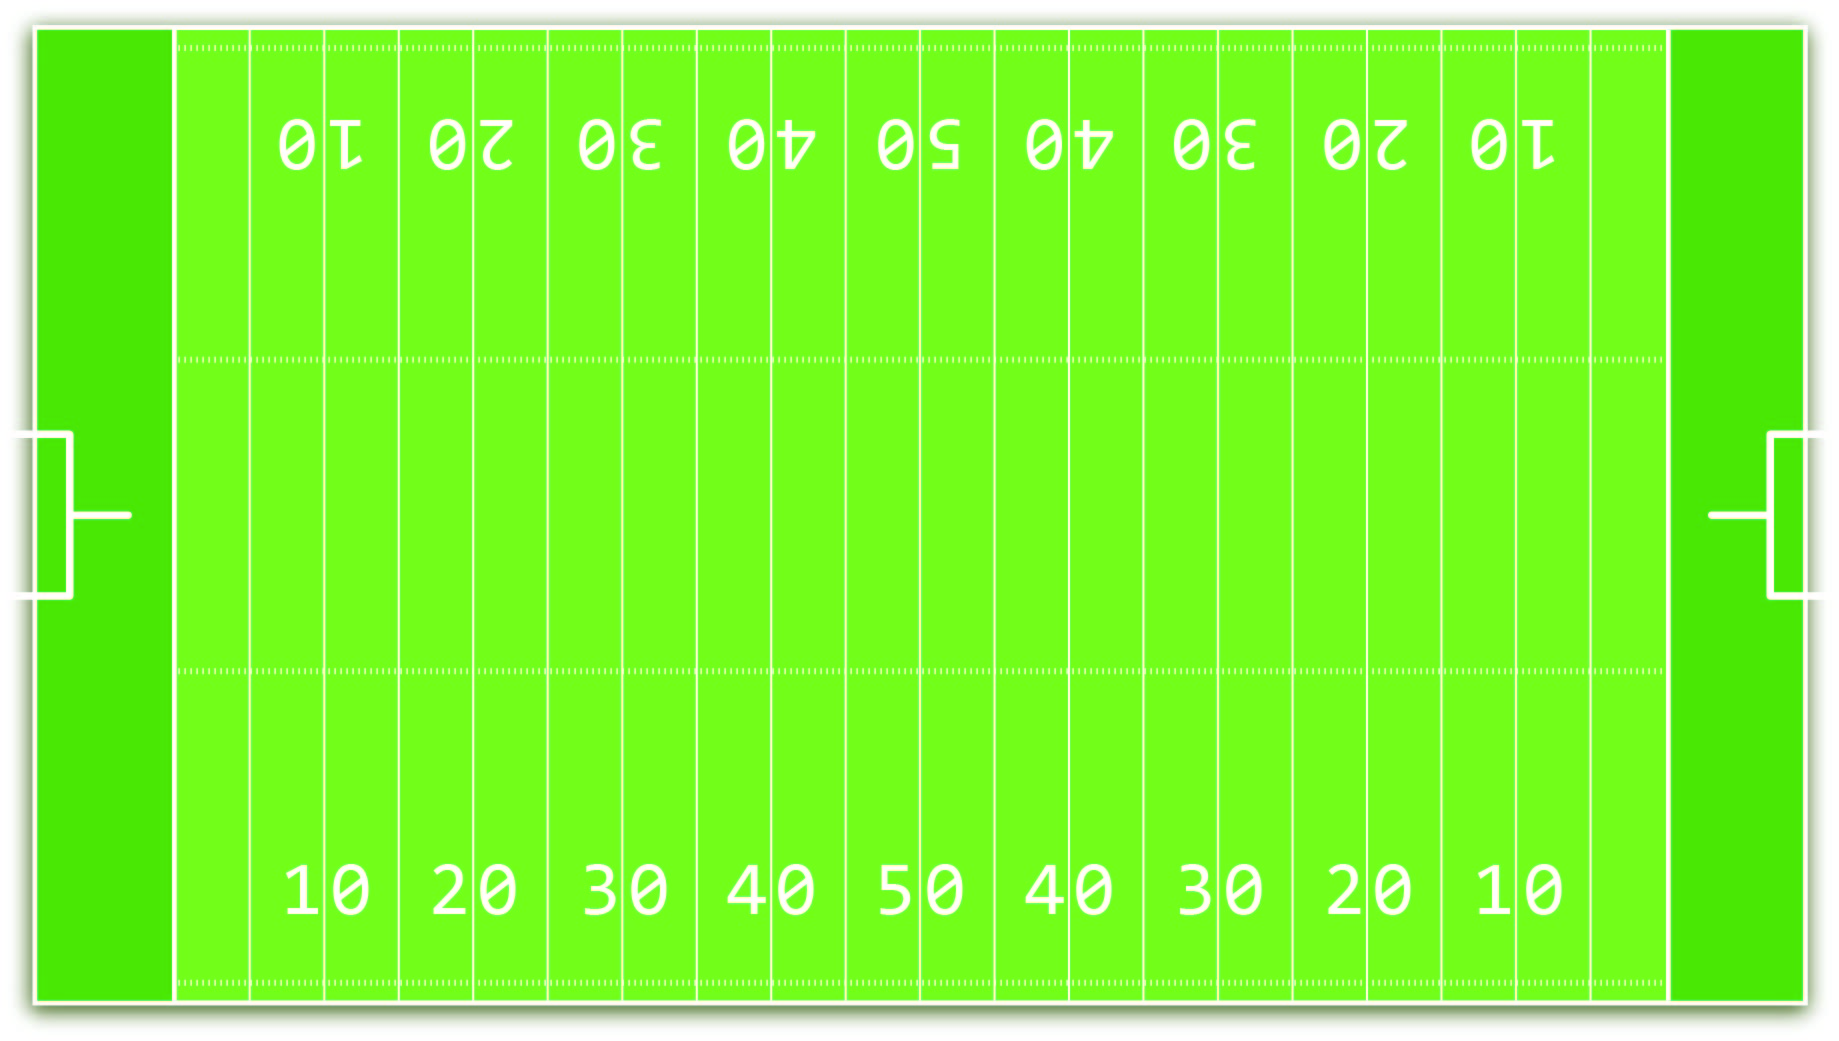

## Building the Special Teams

### Kick Returns (Punts and Kicks)

In [84]:
# import kick returns
kickReturns = pd.read_csv("C:/Users/ryans/Documents/Neural Netwoks-Deep Learning/NFL_data/kickReturns.csv")

In [85]:
kickReturns.drop(['kickRetId', 'playId', 'teamId', 'kickRetOutcome', 'kickRetPosition', 'kickRetPrimary', 'kickRetEnd', 'kickRetNull'], axis = 1, inplace = True)

In [86]:
kickReturns.head()

playerId  kickRetYds  kickRetTd
0  20020185.0          17        NaN
1  19930198.0           5        NaN
2  19930198.0          22        NaN
3  20020185.0          18        NaN
4  20020185.0          28        NaN

In [87]:
df_kickReturns = kickReturns.groupby(['playerId']).agg({'kickRetYds': 'sum', 'kickRetTd': 'sum'})

In [88]:
df_kickReturns.head()

kickRetYds  kickRetTd
playerId                         
19880006.0          48        0.0
19890005.0          41        0.0
19900058.0          64        0.0
19910154.0         668        0.0
19910326.0          89        0.0

In [89]:
# merge with players
special_teams = pd.merge(players, df_kickReturns, on = 'playerId', how = 'left')

In [90]:
# glimpse
special_teams.head()

playerId       nameFull position  age  kickRetYds  kickRetTd
0  19770001     Ricky Bell       RB   68         NaN        NaN
1  19770002   Tony Dorsett       RB   69         NaN        NaN
2  19770003  Eddie Edwards       DE   69         NaN        NaN
3  19770004  Marvin Powell       OT   68         NaN        NaN
4  19770005     Gary Jeter       DE   68         NaN        NaN

In [91]:
special_teams.tail()

playerId        nameFull position  age  kickRetYds  kickRetTd
20195  20191194  Fisayo Awolaja       OG   27         NaN        NaN
20196  20191195    Quart'e Sapp       LB   26         NaN        NaN
20197  20191196     Kirk Barron        C   28         NaN        NaN
20198  20191198  Jordan Holland       DB   28         NaN        NaN
20199  20191200   Tavonn Salter       WR   27         NaN        NaN

In [92]:
special_teams['playerId'].value_counts()

playerId
20050015    2
20060229    2
20110246    1
20110408    1
20110407    1
           ..
20000190    1
20000189    1
20000188    1
20000187    1
20191200    1
Name: count, Length: 20198, dtype: int64

In [93]:
# remove duplicates
special_teams.drop_duplicates(inplace = True)

### Kicks (Punts and Kicks)

In [94]:
# import data
kicks = pd.read_csv("C:/Users/ryans/Documents/Neural Netwoks-Deep Learning/NFL_data/kicks.csv")

In [95]:
kicks.head()

kickId  playId  teamId  playerId kickPosition kickType kickOutcome  \
0  300001       1    3200  19960452            K  kickoff    returned   
1  300002       7    3800  19940992            P     punt    returned   
2  300003      15    3200  19940450            P     punt   touchback   
3  300004      20    3800  19940992            P     punt    returned   
4  300005      31    3200  19960452            K       xp        good   

   kickInside20  kickOnside  kickOwnRecovery  kickLength  kickReturnYds  \
0             1           0                0        72.0             17   
1             1           0                0        41.0              5   
2             0           0                0        53.0              0   
3             0           0                0        55.0             22   
4             0           0                0        19.0              0   

   kickNetYds  kickReturnTd  kickNull  
0        55.0             0         0  
1        36.0             0         0  
2        53.0             0         0  
3        33.0             0         0  
4         0.0             0         0

In [96]:
# remove unwanted columns
kicks.drop(['kickId', 'playId', 'kickOnside', 'kickOwnRecovery', 'kickReturnYds', 'kickReturnTd', 'kickNull'], axis = 1, inplace = True)

In [97]:
# glimpse of data
kicks.head()

teamId  playerId kickPosition kickType kickOutcome  kickInside20  \
0    3200  19960452            K  kickoff    returned             1   
1    3800  19940992            P     punt    returned             1   
2    3200  19940450            P     punt   touchback             0   
3    3800  19940992            P     punt    returned             0   
4    3200  19960452            K       xp        good             0   

   kickLength  kickNetYds  
0        72.0        55.0  
1        41.0        36.0  
2        53.0        53.0  
3        55.0        33.0  
4        19.0         0.0

In [98]:
# what kind of outcomes do we have
kicks['kickOutcome'].value_counts()

kickOutcome
returned         56926
good             40126
touchback        22076
fair catch       11568
downed            6625
out of bounds     5175
missed            3519
onside            1064
blocked            823
own recovery        12
Name: count, dtype: int64

In [99]:
# what kind of kicks do we have
kicks['kickType'].value_counts()

kickType
kickoff       52270
punt          51544
xp            23952
field goal    20245
aborted           2
pass              1
Name: count, dtype: int64

#### Creating Punt Data

In [100]:
punts = kicks[kicks['kickType'] == 'punt']

In [101]:
punts.head()

teamId  playerId kickPosition kickType kickOutcome  kickInside20  \
1     3800  19940992            P     punt    returned             1   
2     3200  19940450            P     punt   touchback             0   
3     3800  19940992            P     punt    returned             0   
8     3800  19940992            P     punt    returned             0   
13    3200  19940450            P     punt  fair catch             1   

    kickLength  kickNetYds  
1         41.0        36.0  
2         53.0        53.0  
3         55.0        33.0  
8         43.0        45.0  
13        31.0        31.0

In [102]:
# aggregate punt info
punts = punts.groupby('playerId').agg({'kickNetYds': 'sum'})

In [103]:
punts.head()

kickNetYds
playerId            
19830400      3599.0
19880068      4669.0
19880400     21634.0
19890146      4056.0
19900329        33.0

In [104]:
# add punts to special teams
special_teams = pd.merge(special_teams, punts, on = 'playerId', how = 'left')

In [105]:
special_teams.head()

playerId       nameFull position  age  kickRetYds  kickRetTd  kickNetYds
0  19770001     Ricky Bell       RB   68         NaN        NaN         NaN
1  19770002   Tony Dorsett       RB   69         NaN        NaN         NaN
2  19770003  Eddie Edwards       DE   69         NaN        NaN         NaN
3  19770004  Marvin Powell       OT   68         NaN        NaN         NaN
4  19770005     Gary Jeter       DE   68         NaN        NaN         NaN

In [106]:
special_teams.tail()

playerId        nameFull position  age  kickRetYds  kickRetTd  \
20193  20191194  Fisayo Awolaja       OG   27         NaN        NaN   
20194  20191195    Quart'e Sapp       LB   26         NaN        NaN   
20195  20191196     Kirk Barron        C   28         NaN        NaN   
20196  20191198  Jordan Holland       DB   28         NaN        NaN   
20197  20191200   Tavonn Salter       WR   27         NaN        NaN   

       kickNetYds  
20193         NaN  
20194         NaN  
20195         NaN  
20196         NaN  
20197         NaN

In [107]:
special_teams.describe()

playerId           age    kickRetYds    kickRetTd    kickNetYds
count  2.019800e+04  20198.000000   1590.000000  1590.000000    279.000000
mean   2.003559e+07     42.341717    507.178616     0.276101   7322.186380
std    1.124622e+05     11.186057   1174.717341     1.220187  12781.988356
min    1.977000e+07     24.000000    -56.000000     0.000000     10.000000
25%    1.995024e+07     33.000000     17.000000     0.000000    156.500000
50%    2.006005e+07     40.000000     78.000000     0.000000    552.000000
75%    2.013048e+07     51.000000    405.750000     0.000000   8758.500000
max    2.019120e+07     75.000000  11325.000000    21.000000  65608.000000

#### Creating Field Goal Data

In [108]:
# create dataframe of successful kicks
field_goals = kicks[kicks['kickOutcome'] == 'good']

In [109]:
field_goals.head()

teamId  playerId kickPosition    kickType kickOutcome  kickInside20  \
4     3200  19960452            K          xp        good             0   
6     3200  19960452            K          xp        good             0   
9     3800  20000169            K  field goal        good             0   
11    3800  20000169            K  field goal        good             0   
16    3200  19960452            K  field goal        good             0   

    kickLength  kickNetYds  
4         19.0         0.0  
6         19.0         0.0  
9         51.0         0.0  
11        52.0         0.0  
16        29.0         0.0

In [110]:
# aggregate the kick outcomes
field_goals['kickOutcome'] = 1

C:\Users\ryans\AppData\Local\Temp\ipykernel_12552\63865788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_goals['kickOutcome'] = 1


In [111]:
field_goals.head()

teamId  playerId kickPosition    kickType  kickOutcome  kickInside20  \
4     3200  19960452            K          xp            1             0   
6     3200  19960452            K          xp            1             0   
9     3800  20000169            K  field goal            1             0   
11    3800  20000169            K  field goal            1             0   
16    3200  19960452            K  field goal            1             0   

    kickLength  kickNetYds  
4         19.0         0.0  
6         19.0         0.0  
9         51.0         0.0  
11        52.0         0.0  
16        29.0         0.0

In [112]:
# aggregate the successful kicks
field_goals = field_goals.groupby('playerId').agg({'kickOutcome': 'sum'})

In [113]:
field_goals.head()

kickOutcome
playerId             
19820086          170
19820171           54
19850285            1
19870400          399
19900329          413

In [114]:
# merge with special teams
special_teams = pd.merge(special_teams, field_goals, on = 'playerId', how = 'left')

In [115]:
special_teams.head()

playerId       nameFull position  age  kickRetYds  kickRetTd  kickNetYds  \
0  19770001     Ricky Bell       RB   68         NaN        NaN         NaN   
1  19770002   Tony Dorsett       RB   69         NaN        NaN         NaN   
2  19770003  Eddie Edwards       DE   69         NaN        NaN         NaN   
3  19770004  Marvin Powell       OT   68         NaN        NaN         NaN   
4  19770005     Gary Jeter       DE   68         NaN        NaN         NaN   

   kickOutcome  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [116]:
special_teams.describe()

playerId           age    kickRetYds    kickRetTd    kickNetYds  \
count  2.019800e+04  20198.000000   1590.000000  1590.000000    279.000000   
mean   2.003559e+07     42.341717    507.178616     0.276101   7322.186380   
std    1.124622e+05     11.186057   1174.717341     1.220187  12781.988356   
min    1.977000e+07     24.000000    -56.000000     0.000000     10.000000   
25%    1.995024e+07     33.000000     17.000000     0.000000    156.500000   
50%    2.006005e+07     40.000000     78.000000     0.000000    552.000000   
75%    2.013048e+07     51.000000    405.750000     0.000000   8758.500000   
max    2.019120e+07     75.000000  11325.000000    21.000000  65608.000000   

       kickOutcome  
count   224.000000  
mean    178.928571  
std     287.854121  
min       1.000000  
25%       5.000000  
50%      18.000000  
75%     274.750000  
max    1358.000000

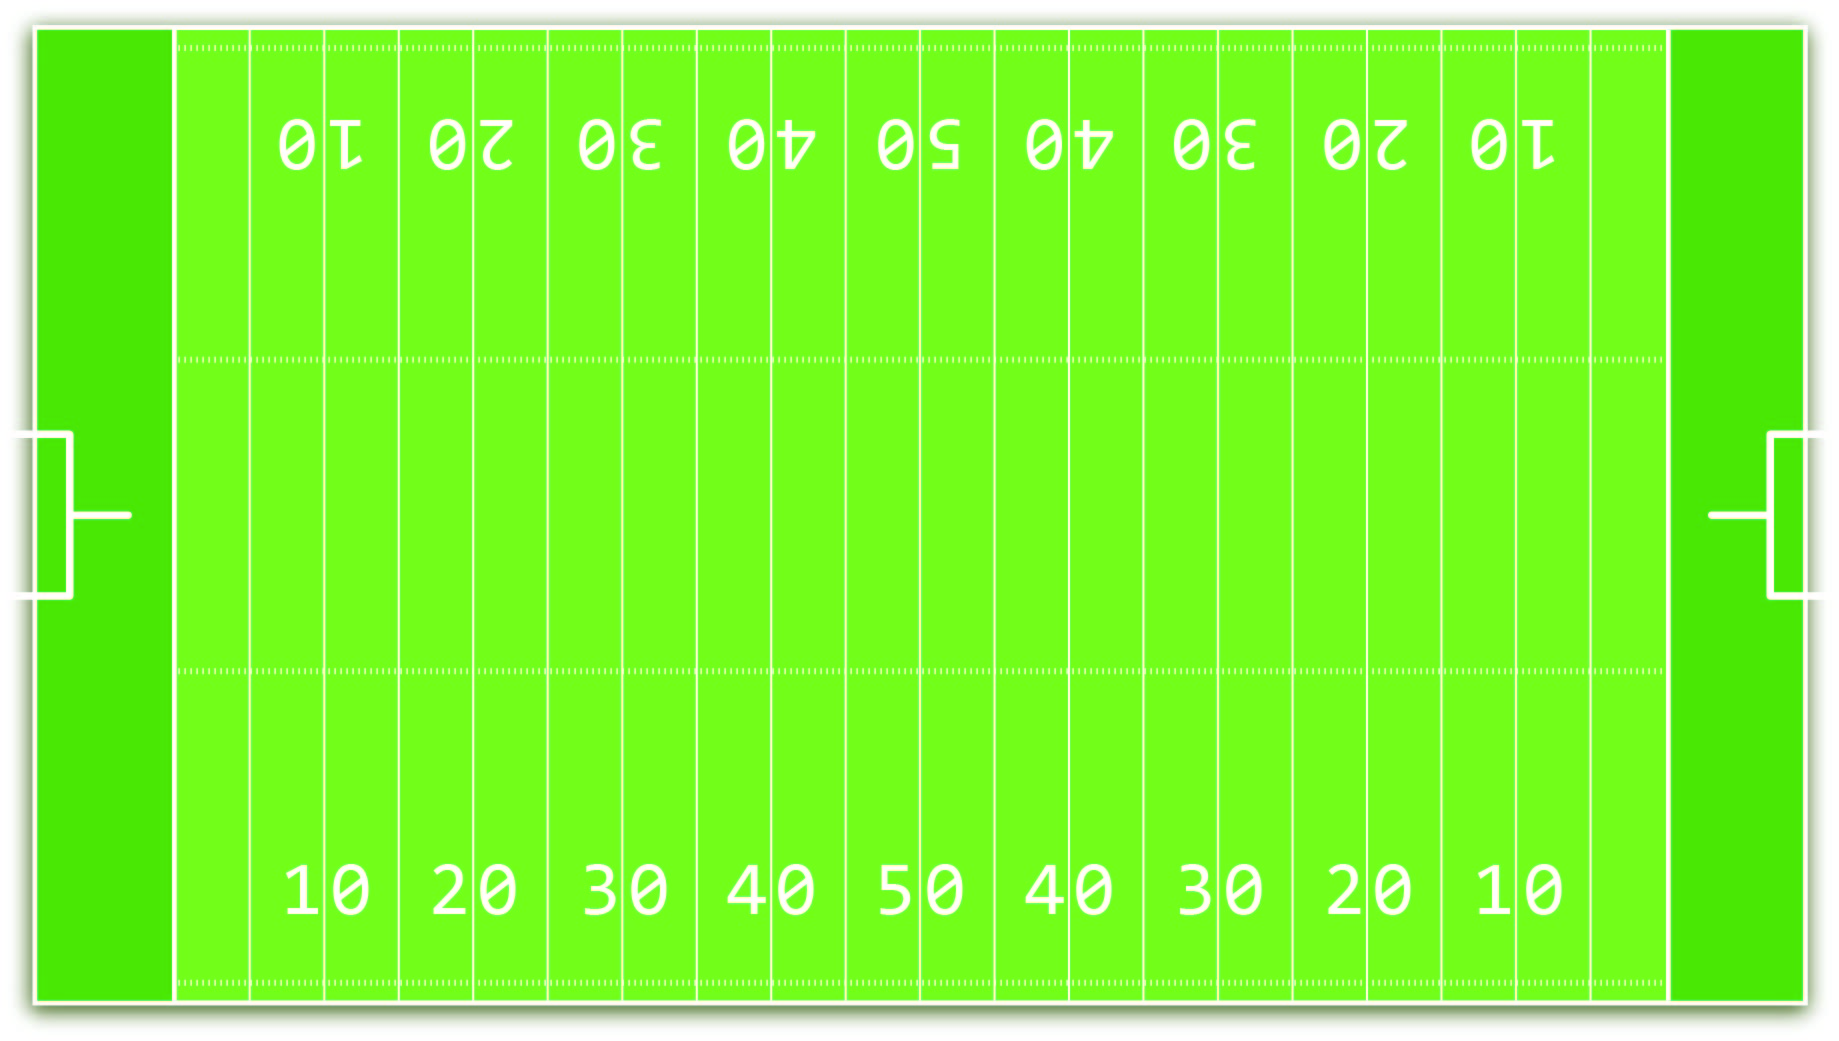

### Building the Offense

The offense will be built using receiving stats, rushing stats, and passing stats.

In [117]:
# import receiver stats
receiver = pd.read_csv("C:/Users/ryans/Documents/Neural Netwoks-Deep Learning/NFL_data/receiver.csv")

In [118]:
receiver.head()

receiverId    playId  teamId  playerId recPosition  recYards  rec  recYac  \
0    15235157  15088495    4500  20100082          WR        18    1       0   
1    15235174  15088533    4500  20100082          WR         5    1       0   
2    15235175  15088534    4500  20100082          WR        15    1       2   
3    15235184  15088552    4500  20100082          WR         0    0       0   
4    15235213  15088610    4500  20100082          WR         0    0       0   

   rec1down  recFumble  recPassDef  recPassInt     recEnd  recNull  
0         0          0           0           0  in bounds        0  
1         0          0           0           0  in bounds        0  
2         0          0           0           0  in bounds        0  
3         0          0           0           0  in bounds        0  
4         0          0           0           0  in bounds        0

In [119]:
receiver.drop(['receiverId', 'playId', 'teamId', 'recPosition', 'recFumble', 'recPassDef',
               'recPassInt', 'recEnd', 'recNull'], axis = 1, inplace = True)

In [120]:
receiver.drop(['recYac', 'rec1down'], axis = 1, inplace = True)

In [121]:
receiver.head()

playerId  recYards  rec
0  20100082        18    1
1  20100082         5    1
2  20100082        15    1
3  20100082         0    0
4  20100082         0    0

In [122]:
# aggregate
df_receiver = receiver.groupby('playerId').agg({'recYards': 'sum', 'rec': 'sum'})

In [123]:
# glimpse of data
df_receiver.head(n = 20)

recYards  rec
playerId               
19850016       483   36
19880006       231   28
19890005         0    0
19900017       119   17
19900058      1132   75
19910033        27    3
19910154        20    3
19910326      2169  172
19920005         0    0
19920036      2337  156
19920191        31    5
19920291         0    0
19930003        26    3
19930007       432   41
19930010       107   12
19930089       380   69
19930098        30    3
19930115         0    0
19930144       215   28
19930145         0    0

In [124]:
# glimpse of receiver data
df_receiver.describe()

recYards          rec
count   3194.000000  3194.000000
mean     758.611459    66.437070
std     1636.929026   131.525685
min      -27.000000     0.000000
25%       31.000000     4.000000
50%      143.000000    14.000000
75%      630.250000    62.000000
max    17372.000000  1427.000000

In [125]:
# merge with player data
offense = pd.merge(players, df_receiver, on = 'playerId', how = 'left')

In [126]:
offense.head()

playerId       nameFull position  age  recYards  rec
0  19770001     Ricky Bell       RB   68       NaN  NaN
1  19770002   Tony Dorsett       RB   69       NaN  NaN
2  19770003  Eddie Edwards       DE   69       NaN  NaN
3  19770004  Marvin Powell       OT   68       NaN  NaN
4  19770005     Gary Jeter       DE   68       NaN  NaN

In [127]:
offense.tail()

playerId        nameFull position  age  recYards  rec
20195  20191194  Fisayo Awolaja       OG   27       NaN  NaN
20196  20191195    Quart'e Sapp       LB   26       NaN  NaN
20197  20191196     Kirk Barron        C   28       NaN  NaN
20198  20191198  Jordan Holland       DB   28       NaN  NaN
20199  20191200   Tavonn Salter       WR   27       NaN  NaN

### Rushing

In [128]:
# import data
rusher = pd.read_csv("C:/Users/ryans/Documents/Neural Netwoks-Deep Learning/NFL_data/rusher.csv")

In [129]:
rusher.head()

rushId    playId  teamId  playerId rushPosition     rushType  \
0  15184506  15088563    2310  20130063           TE         rush   
1  15184496  15088531    4500  20140062           QB        kneel   
2  15184510  15088575    4500  20140062           QB  qb scramble   
3  15184471  15088462    2310  20140629           RB         rush   
4  15184477  15088479    2310  20140629           RB         rush   

  rushDirection rushLandmark  rushYards  rushPrimary  rushTd  \
0         right       tackle          2            1     0.0   
1           NaN          NaN         -1            1     0.0   
2         right          end          3            1     0.0   
3         right          end          7            1     0.0   
4          left        guard          2            1     0.0   

             rushEnd  rushNull  
0          in bounds         0  
1          in bounds         0  
2  ran out of bounds         0  
3          in bounds         0  
4          in bounds         0

In [130]:
rusher.drop(['rushId', 'playId', 'teamId', 'rushPosition', 'rushType', 'rushDirection',
             'rushLandmark', 'rushPrimary', 'rushEnd', 'rushNull'], axis = 1, inplace = True)

In [131]:
rusher.head()

playerId  rushYards  rushTd
0  20130063          2     0.0
1  20140062         -1     0.0
2  20140062          3     0.0
3  20140629          7     0.0
4  20140629          2     0.0

In [132]:
# aggregate
df_rusher = rusher.groupby('playerId').agg({'rushYards': 'sum', 'rushTd': 'sum'})

In [133]:
# first 5 rows
df_rusher.head()

rushYards  rushTd
playerId                   
2504378           5     0.0
2505354           0     0.0
19850285         42     2.0
19870001         59     3.0
19870098         34     0.0

In [134]:
# glimpse of data
df_rusher.describe()

rushYards       rushTd
count   1950.000000  1950.000000
mean     588.438462     4.081538
std     1432.610239    10.575537
min      -59.000000     0.000000
25%       12.000000     0.000000
50%       78.000000     0.000000
75%      380.250000     3.000000
max    14856.000000   109.000000

In [135]:
# combine rushing and receiving
offense = pd.merge(offense, df_rusher, on = 'playerId', how = 'left')

In [136]:
# rushing and receiving
offense.head(n = 20)

playerId            nameFull position  age  recYards  rec  rushYards  \
0   19770001          Ricky Bell       RB   68       NaN  NaN        NaN   
1   19770002        Tony Dorsett       RB   69       NaN  NaN        NaN   
2   19770003       Eddie Edwards       DE   69       NaN  NaN        NaN   
3   19770004       Marvin Powell       OT   68       NaN  NaN        NaN   
4   19770005          Gary Jeter       DE   68       NaN  NaN        NaN   
5   19770006       Warren Bryant       OT   67       NaN  NaN        NaN   
6   19770007        Joe Campbell       DE   68       NaN  NaN        NaN   
7   19770008      Wilson Whitley       DT   68       NaN  NaN        NaN   
8   19770009         Mike Butler       DE   69       NaN  NaN        NaN   
9   19770010          Gary Green       DB   68       NaN  NaN        NaN   
10  19770011        Morris Towns       OT   69       NaN  NaN        NaN   
11  19770012          Phil Dokes       DT   68       NaN  NaN        NaN   
12  19770013           A.J. Duhe       LB   67       NaN  NaN        NaN   
13  19770014        Steve August       OT   69       NaN  NaN        NaN   
14  19770015        Ted Albrecht       OT   69       NaN  NaN        NaN   
15  19770016    Raymond Clayborn       DB   68       NaN  NaN        NaN   
16  19770017      Robert Jackson       LB   69       NaN  NaN        NaN   
17  19770018     Steve Schindler       OG   69       NaN  NaN        NaN   
18  19770019  Steve Pisarkiewicz       QB   69       NaN  NaN        NaN   
19  19770020     Wilson Faumuina       DT   69       NaN  NaN        NaN   

    rushTd  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
5      NaN  
6      NaN  
7      NaN  
8      NaN  
9      NaN  
10     NaN  
11     NaN  
12     NaN  
13     NaN  
14     NaN  
15     NaN  
16     NaN  
17     NaN  
18     NaN  
19     NaN

In [137]:
offense.tail()

playerId        nameFull position  age  recYards  rec  rushYards  \
20195  20191194  Fisayo Awolaja       OG   27       NaN  NaN        NaN   
20196  20191195    Quart'e Sapp       LB   26       NaN  NaN        NaN   
20197  20191196     Kirk Barron        C   28       NaN  NaN        NaN   
20198  20191198  Jordan Holland       DB   28       NaN  NaN        NaN   
20199  20191200   Tavonn Salter       WR   27       NaN  NaN        NaN   

       rushTd  
20195     NaN  
20196     NaN  
20197     NaN  
20198     NaN  
20199     NaN

### Passing

In [138]:
passer = pd.read_csv("C:/Users/ryans/Documents/Neural Netwoks-Deep Learning/NFL_data/passer.csv")

In [139]:
passer.head()

passId    playId  teamId  playerId passPosition passOutcomes  \
0  15154145  15088467    4500  20140062           QB     complete   
1  15154146  15088472    4500  20140062           QB     complete   
2  15154147  15088473    4500  20140062           QB     complete   
3  15154148  15088474    4500  20140062           QB   incomplete   
4  15154149  15088475    4500  20140062           QB   incomplete   

  passDirection passDepth  passLength  passAtt  passComp  passTd  passInt  \
0          left     short           0        1         1       0        0   
1        middle     short          -1        1         1       0        0   
2         right     short          -2        1         1       0        0   
3        middle     short           5        1         0       0        0   
4          left     short           6        1         0       0        0   

   passIntTd  passSack  passSackYds  passHit  passDef  passNull  
0          0         0            0        0        1         0  
1          0         0            0        0        0         0  
2          0         0            0        0        0         0  
3          0         0            0        0        0         1  
4          0         0            0        0        0         0

In [140]:
passer.drop(['passId', 'playId', 'teamId', 'passPosition', 'passDirection', 'passDepth', 'passIntTd',
            'passSack', 'passSackYds', 'passHit', 'passDef', 'passInt', '' 'passNull'], axis = 1, inplace = True)

In [141]:
passer.head()

playerId passOutcomes  passLength  passAtt  passComp  passTd
0  20140062     complete           0        1         1       0
1  20140062     complete          -1        1         1       0
2  20140062     complete          -2        1         1       0
3  20140062   incomplete           5        1         0       0
4  20140062   incomplete           6        1         0       0

In [142]:
passer = passer[passer['passOutcomes'] == 'complete']

In [143]:
passer.head()

playerId passOutcomes  passLength  passAtt  passComp  passTd
0  20140062     complete           0        1         1       0
1  20140062     complete          -1        1         1       0
2  20140062     complete          -2        1         1       0
5  20140062     complete          18        1         1       0
6  20140062     complete          -6        1         1       0

In [144]:
passer.drop(['passOutcomes', 'passAtt'], axis = 1, inplace = True)

In [145]:
passer.head()

playerId  passLength  passComp  passTd
0  20140062           0         1       0
1  20140062          -1         1       0
2  20140062          -2         1       0
5  20140062          18         1       0
6  20140062          -6         1       0

In [146]:
df_passer = passer.groupby('playerId').agg({'passLength': 'sum','passComp': 'sum',
                                'passTd': 'sum'})

In [147]:
df_passer.head()

passLength  passComp  passTd
playerId                              
19850285           0        48       3
19870001         532       498      25
19870098           0        70       4
19880076           0        64       4
19890141           0        13       1

In [148]:
df_passer.columns = ['passYards', 'passComp', 'passTd']

In [149]:
# glimpse of data
df_passer.describe()

passYards     passComp      passTd
count    603.000000   603.000000  603.000000
mean    2090.847430   370.726368   25.265340
std     5335.555146   887.859956   68.065821
min      -15.000000     1.000000    0.000000
25%       11.000000     3.000000    0.000000
50%      163.000000    36.000000    2.000000
75%     1465.000000   286.500000   14.500000
max    40225.000000  7243.000000  594.000000

### Combining the Three Offensive Dataframes

In [150]:
offense = pd.merge(offense, df_passer, on = 'playerId', how = 'left')

In [151]:
offense.head(n = 10)

playerId        nameFull position  age  recYards  rec  rushYards  rushTd  \
0  19770001      Ricky Bell       RB   68       NaN  NaN        NaN     NaN   
1  19770002    Tony Dorsett       RB   69       NaN  NaN        NaN     NaN   
2  19770003   Eddie Edwards       DE   69       NaN  NaN        NaN     NaN   
3  19770004   Marvin Powell       OT   68       NaN  NaN        NaN     NaN   
4  19770005      Gary Jeter       DE   68       NaN  NaN        NaN     NaN   
5  19770006   Warren Bryant       OT   67       NaN  NaN        NaN     NaN   
6  19770007    Joe Campbell       DE   68       NaN  NaN        NaN     NaN   
7  19770008  Wilson Whitley       DT   68       NaN  NaN        NaN     NaN   
8  19770009     Mike Butler       DE   69       NaN  NaN        NaN     NaN   
9  19770010      Gary Green       DB   68       NaN  NaN        NaN     NaN   

   passYards  passComp  passTd  
0        NaN       NaN     NaN  
1        NaN       NaN     NaN  
2        NaN       NaN     NaN  
3        NaN       NaN     NaN  
4        NaN       NaN     NaN  
5        NaN       NaN     NaN  
6        NaN       NaN     NaN  
7        NaN       NaN     NaN  
8        NaN       NaN     NaN  
9        NaN       NaN     NaN

In [152]:
offense.tail()

playerId        nameFull position  age  recYards  rec  rushYards  \
20195  20191194  Fisayo Awolaja       OG   27       NaN  NaN        NaN   
20196  20191195    Quart'e Sapp       LB   26       NaN  NaN        NaN   
20197  20191196     Kirk Barron        C   28       NaN  NaN        NaN   
20198  20191198  Jordan Holland       DB   28       NaN  NaN        NaN   
20199  20191200   Tavonn Salter       WR   27       NaN  NaN        NaN   

       rushTd  passYards  passComp  passTd  
20195     NaN        NaN       NaN     NaN  
20196     NaN        NaN       NaN     NaN  
20197     NaN        NaN       NaN     NaN  
20198     NaN        NaN       NaN     NaN  
20199     NaN        NaN       NaN     NaN

In [153]:
offense.describe()

playerId           age      recYards          rec     rushYards  \
count  2.020000e+04  20200.000000   3152.000000  3152.000000   1930.000000   
mean   2.003559e+07     42.341436    767.055203    67.166561    593.316062   
std    1.124568e+05     11.185540   1645.998598   132.234085   1439.173571   
min    1.977000e+07     24.000000    -27.000000     0.000000    -59.000000   
25%    1.995024e+07     33.000000     32.000000     3.000000     12.000000   
50%    2.006005e+07     40.000000    144.000000    15.000000     77.500000   
75%    2.013048e+07     51.000000    646.000000    63.000000    389.750000   
max    2.019120e+07     75.000000  17372.000000  1427.000000  14856.000000   

            rushTd     passYards     passComp      passTd  
count  1930.000000    599.000000   599.000000  599.000000  
mean      4.115544   2104.661102   373.158598   25.430718  
std      10.624249   5350.678140   890.322872   68.262832  
min       0.000000    -15.000000     1.000000    0.000000  
25%       0.000000     11.000000     3.000000    0.000000  
50%       0.000000    166.000000    37.000000    2.000000  
75%       3.000000   1490.500000   287.000000   15.000000  
max     109.000000  40225.000000  7243.000000  594.000000

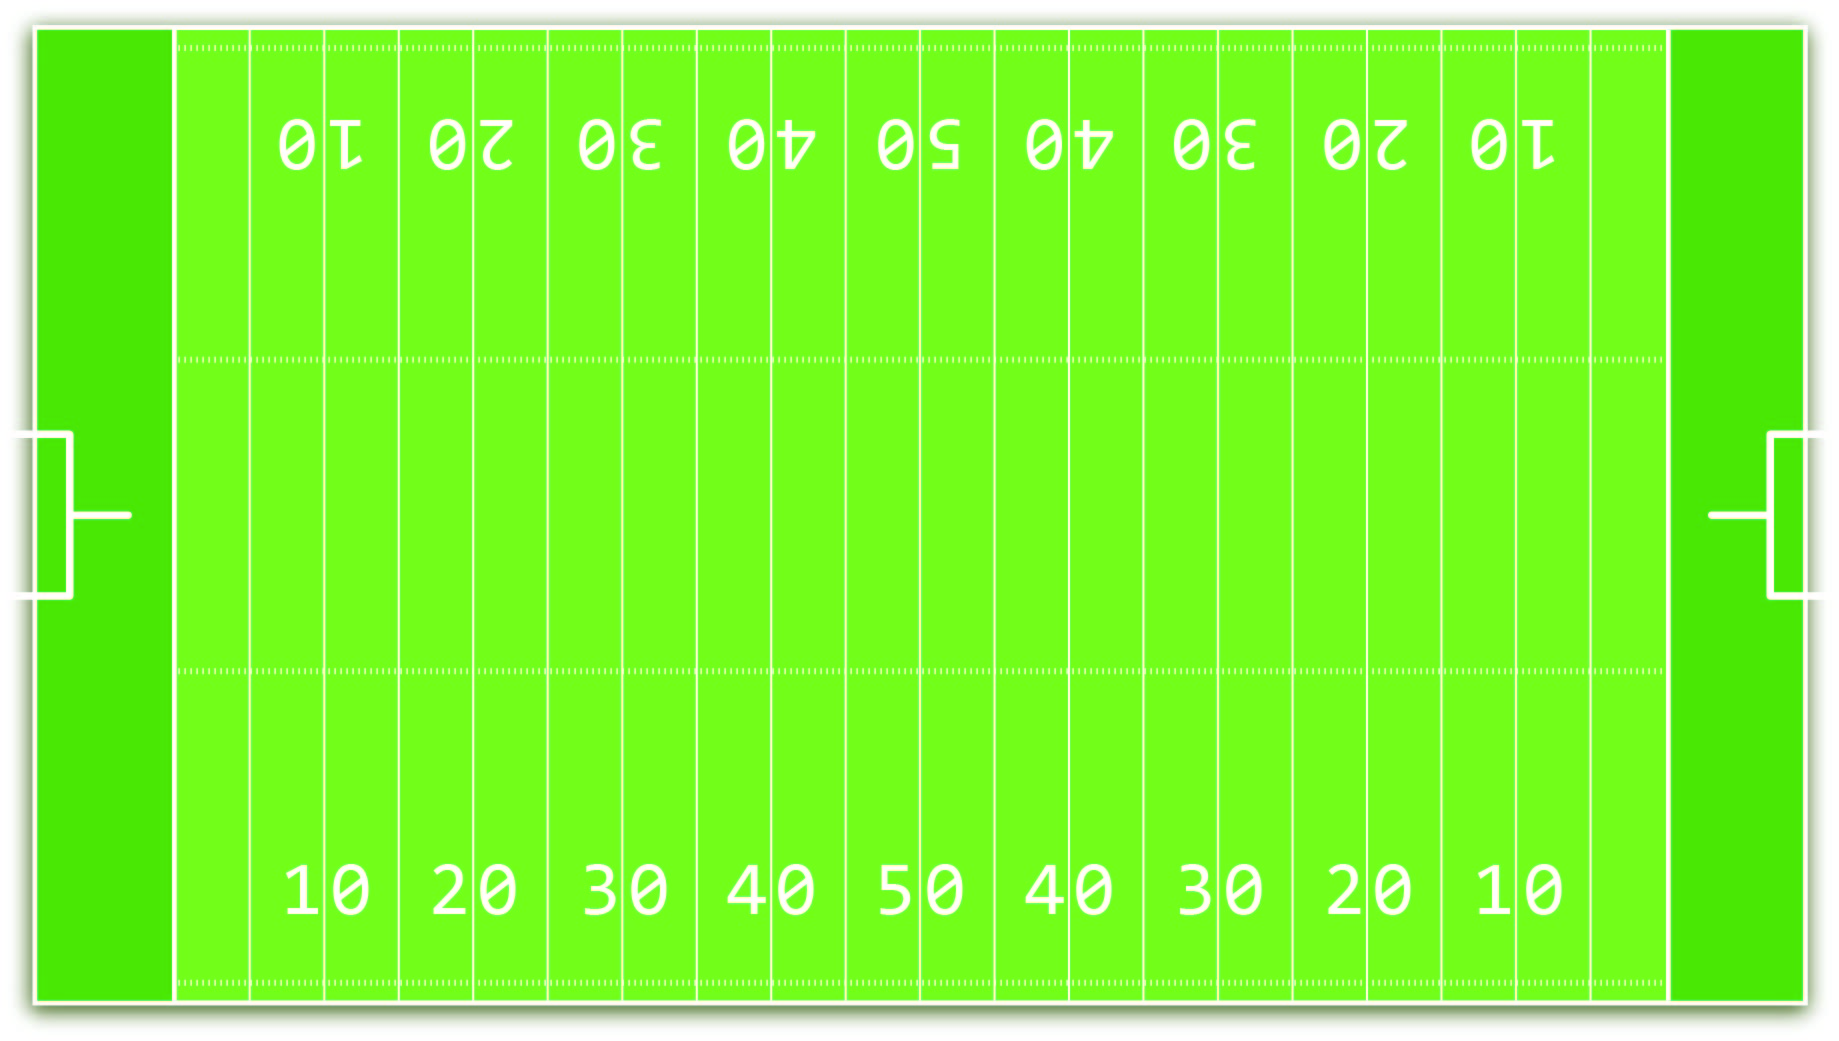

## Formatting Data for Target Variable

In [154]:
from sklearn.impute import SimpleImputer

### Defense 

In [155]:
# start with defense
imputer = SimpleImputer(strategy='constant', fill_value= 0)

# fit to data
imputer.fit(defense[['tackleType', 'passDef','sackType','int', 'qbHit']])

# transform the data
defense[['tackleType', 'passDef','sackType','int', 'qbHit']] = imputer.transform(defense[['tackleType', 'passDef','sackType','int', 'qbHit']])

In [156]:
defense.head()

playerId       nameFull position  age  tackleType  passDef  sackType  int  \
0  19770001     Ricky Bell       RB   68         0.0      0.0       0.0  0.0   
1  19770002   Tony Dorsett       RB   69         0.0      0.0       0.0  0.0   
2  19770003  Eddie Edwards       DE   69         0.0      0.0       0.0  0.0   
3  19770004  Marvin Powell       OT   68         0.0      0.0       0.0  0.0   
4  19770005     Gary Jeter       DE   68         0.0      0.0       0.0  0.0   

   qbHit  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0

In [157]:
defense.tail()

playerId        nameFull position  age  tackleType  passDef  sackType  \
20193  20191194  Fisayo Awolaja       OG   27         0.0      0.0       0.0   
20194  20191195    Quart'e Sapp       LB   26         6.5      0.0       0.0   
20195  20191196     Kirk Barron        C   28         0.0      0.0       0.0   
20196  20191198  Jordan Holland       DB   28         2.0      0.0       0.0   
20197  20191200   Tavonn Salter       WR   27         0.0      0.0       0.0   

       int  qbHit  
20193  0.0    0.0  
20194  0.0    0.0  
20195  0.0    0.0  
20196  0.0    0.0  
20197  0.0    0.0

#### Add Player Rating

In [158]:
from sklearn.preprocessing import MinMaxScaler

In [159]:
# create scaler
scaler = MinMaxScaler()

# fit to data
scaler.fit(defense[['tackleType', 'passDef','sackType','int', 'qbHit']])

# transform the data
defense[['tackleType', 'passDef','sackType','int', 'qbHit']] = scaler.transform(defense[['tackleType', 'passDef','sackType','int', 'qbHit']])

In [160]:
defense.tail()

playerId        nameFull position  age  tackleType  passDef  sackType  \
20193  20191194  Fisayo Awolaja       OG   27    0.000000      0.0       0.0   
20194  20191195    Quart'e Sapp       LB   26    0.004944      0.0       0.0   
20195  20191196     Kirk Barron        C   28    0.000000      0.0       0.0   
20196  20191198  Jordan Holland       DB   28    0.001521      0.0       0.0   
20197  20191200   Tavonn Salter       WR   27    0.000000      0.0       0.0   

       int  qbHit  
20193  0.0    0.0  
20194  0.0    0.0  
20195  0.0    0.0  
20196  0.0    0.0  
20197  0.0    0.0

In [161]:
# rating column
defense['rating'] = defense['tackleType'] + defense['passDef'] + defense['sackType'] + defense['int'] + defense['qbHit']

In [162]:
defense.tail()

playerId        nameFull position  age  tackleType  passDef  sackType  \
20193  20191194  Fisayo Awolaja       OG   27    0.000000      0.0       0.0   
20194  20191195    Quart'e Sapp       LB   26    0.004944      0.0       0.0   
20195  20191196     Kirk Barron        C   28    0.000000      0.0       0.0   
20196  20191198  Jordan Holland       DB   28    0.001521      0.0       0.0   
20197  20191200   Tavonn Salter       WR   27    0.000000      0.0       0.0   

       int  qbHit    rating  
20193  0.0    0.0  0.000000  
20194  0.0    0.0  0.004944  
20195  0.0    0.0  0.000000  
20196  0.0    0.0  0.001521  
20197  0.0    0.0  0.000000

In [163]:
defense.describe()

playerId           age    tackleType       passDef      sackType  \
count  2.019800e+04  20198.000000  20198.000000  20198.000000  20198.000000   
mean   2.003559e+07     42.341717      0.023723      0.011444      0.006728   
std    1.124622e+05     11.186057      0.076811      0.051607      0.037502   
min    1.977000e+07     24.000000      0.000000      0.000000      0.000000   
25%    1.995024e+07     33.000000      0.000000      0.000000      0.000000   
50%    2.006005e+07     40.000000      0.000000      0.000000      0.000000   
75%    2.013048e+07     51.000000      0.006655      0.000000      0.000000   
max    2.019120e+07     75.000000      1.000000      1.000000      1.000000   

                int         qbHit        rating  
count  20198.000000  20198.000000  20198.000000  
mean       0.009294      0.007692      0.058882  
std        0.052422      0.042598      0.210690  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.007986  
max        1.000000      1.000000      3.281790

In [164]:
# drop those that have no rating because that means we have no stats on them
defense = defense[defense['rating'] > 0]

In [165]:
defense.describe()

playerId          age   tackleType      passDef     sackType  \
count  7.759000e+03  7759.000000  7759.000000  7759.000000  7759.000000   
mean   2.008816e+07    37.003093     0.061755     0.029792     0.017514   
std    6.520325e+04     6.619866     0.114065     0.079917     0.058927   
min    1.982009e+07    24.000000     0.000000     0.000000     0.000000   
25%    2.004022e+07    31.000000     0.004183     0.000000     0.000000   
50%    2.009012e+07    37.000000     0.013120     0.000000     0.000000   
75%    2.014086e+07    42.000000     0.060087     0.019231     0.005618   
max    2.019120e+07    63.000000     1.000000     1.000000     1.000000   

               int        qbHit       rating  
count  7759.000000  7759.000000  7759.000000  
mean      0.024194     0.020025     0.153279  
std       0.082425     0.066911     0.317953  
min       0.000000     0.000000     0.000380  
25%       0.000000     0.000000     0.005134  
50%       0.000000     0.000000     0.018635  
75%       0.000000     0.009063     0.128827  
max       1.000000     1.000000     3.281790

### Special Teams

In [166]:
special_teams.columns

Index(['playerId', 'nameFull', 'position', 'age', 'kickRetYds', 'kickRetTd',
       'kickNetYds', 'kickOutcome'],
      dtype='object')

In [167]:
imputer = SimpleImputer(strategy='constant', fill_value= 0)

# fit to data
imputer.fit(special_teams[['kickRetYds', 'kickRetTd', 'kickNetYds', 'kickOutcome']])

# transform the data
special_teams[['kickRetYds', 'kickRetTd', 'kickNetYds', 'kickOutcome']] = imputer.transform(
    special_teams[['kickRetYds', 'kickRetTd', 'kickNetYds', 'kickOutcome']]
)

In [168]:
special_teams.head()

playerId       nameFull position  age  kickRetYds  kickRetTd  kickNetYds  \
0  19770001     Ricky Bell       RB   68         0.0        0.0         0.0   
1  19770002   Tony Dorsett       RB   69         0.0        0.0         0.0   
2  19770003  Eddie Edwards       DE   69         0.0        0.0         0.0   
3  19770004  Marvin Powell       OT   68         0.0        0.0         0.0   
4  19770005     Gary Jeter       DE   68         0.0        0.0         0.0   

   kickOutcome  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [169]:
special_teams.tail()

playerId        nameFull position  age  kickRetYds  kickRetTd  \
20193  20191194  Fisayo Awolaja       OG   27         0.0        0.0   
20194  20191195    Quart'e Sapp       LB   26         0.0        0.0   
20195  20191196     Kirk Barron        C   28         0.0        0.0   
20196  20191198  Jordan Holland       DB   28         0.0        0.0   
20197  20191200   Tavonn Salter       WR   27         0.0        0.0   

       kickNetYds  kickOutcome  
20193         0.0          0.0  
20194         0.0          0.0  
20195         0.0          0.0  
20196         0.0          0.0  
20197         0.0          0.0

In [170]:
# scale the data between 0 and 1
scaler = MinMaxScaler()

# fit to data
scaler.fit(special_teams[['kickRetYds', 'kickRetTd', 'kickNetYds', 'kickOutcome']])

# transform the data
special_teams[['kickRetYds', 'kickRetTd', 'kickNetYds', 'kickOutcome']] = scaler.transform(
    special_teams[['kickRetYds', 'kickRetTd', 'kickNetYds', 'kickOutcome']]
)

In [171]:
# add rating column 
special_teams['rating'] = special_teams['kickRetYds'] + special_teams['kickRetTd'] + special_teams['kickNetYds'] + special_teams['kickOutcome']

In [172]:
special_teams.tail()

playerId        nameFull position  age  kickRetYds  kickRetTd  \
20193  20191194  Fisayo Awolaja       OG   27     0.00492        0.0   
20194  20191195    Quart'e Sapp       LB   26     0.00492        0.0   
20195  20191196     Kirk Barron        C   28     0.00492        0.0   
20196  20191198  Jordan Holland       DB   28     0.00492        0.0   
20197  20191200   Tavonn Salter       WR   27     0.00492        0.0   

       kickNetYds  kickOutcome   rating  
20193         0.0          0.0  0.00492  
20194         0.0          0.0  0.00492  
20195         0.0          0.0  0.00492  
20196         0.0          0.0  0.00492  
20197         0.0          0.0  0.00492

In [173]:
# drop those with 0 rating
special_teams = special_teams[special_teams['rating'] > 0]

In [174]:
special_teams.describe()

playerId           age    kickRetYds     kickRetTd    kickNetYds  \
count  2.019700e+04  20197.000000  20197.000000  20197.000000  20197.000000   
mean   2.003558e+07     42.342427      0.008429      0.001035      0.001542   
std    1.124610e+05     11.185878      0.031341      0.016678      0.026309   
min    1.977000e+07     24.000000      0.000615      0.000000      0.000000   
25%    1.995024e+07     33.000000      0.004920      0.000000      0.000000   
50%    2.006005e+07     40.000000      0.004920      0.000000      0.000000   
75%    2.013048e+07     51.000000      0.004920      0.000000      0.000000   
max    2.019120e+07     75.000000      1.000000      1.000000      1.000000   

        kickOutcome        rating  
count  20197.000000  20197.000000  
mean       0.001461      0.012467  
std        0.026202      0.057362  
min        0.000000      0.000615  
25%        0.000000      0.004920  
50%        0.000000      0.004920  
75%        0.000000      0.004920  
max        1.000000      1.572006

### Offense

In [175]:
offense.columns

Index(['playerId', 'nameFull', 'position', 'age', 'recYards', 'rec',
       'rushYards', 'rushTd', 'passYards', 'passComp', 'passTd'],
      dtype='object')

In [176]:
imputer = SimpleImputer(strategy='constant', fill_value= 0)

# fit to data
imputer.fit(offense[['recYards', 'rec', 'rushYards', 'rushTd', 'passYards',
       'passComp', 'passTd']])

# transform the data
offense[['recYards', 'rec', 'rushYards', 'rushTd', 'passYards','passComp', 'passTd']] = imputer.transform(
    offense[['recYards', 'rec', 'rushYards', 'rushTd', 'passYards',
       'passComp', 'passTd']]
)

In [177]:
offense.head()

playerId       nameFull position  age  recYards  rec  rushYards  rushTd  \
0  19770001     Ricky Bell       RB   68       0.0  0.0        0.0     0.0   
1  19770002   Tony Dorsett       RB   69       0.0  0.0        0.0     0.0   
2  19770003  Eddie Edwards       DE   69       0.0  0.0        0.0     0.0   
3  19770004  Marvin Powell       OT   68       0.0  0.0        0.0     0.0   
4  19770005     Gary Jeter       DE   68       0.0  0.0        0.0     0.0   

   passYards  passComp  passTd  
0        0.0       0.0     0.0  
1        0.0       0.0     0.0  
2        0.0       0.0     0.0  
3        0.0       0.0     0.0  
4        0.0       0.0     0.0

In [178]:
offense.tail()

playerId        nameFull position  age  recYards  rec  rushYards  \
20195  20191194  Fisayo Awolaja       OG   27       0.0  0.0        0.0   
20196  20191195    Quart'e Sapp       LB   26       0.0  0.0        0.0   
20197  20191196     Kirk Barron        C   28       0.0  0.0        0.0   
20198  20191198  Jordan Holland       DB   28       0.0  0.0        0.0   
20199  20191200   Tavonn Salter       WR   27       0.0  0.0        0.0   

       rushTd  passYards  passComp  passTd  
20195     0.0        0.0       0.0     0.0  
20196     0.0        0.0       0.0     0.0  
20197     0.0        0.0       0.0     0.0  
20198     0.0        0.0       0.0     0.0  
20199     0.0        0.0       0.0     0.0

In [179]:
offense.drop_duplicates(inplace = True)

In [180]:
# scale the data between 0 and 1 
scaler = MinMaxScaler()

# fit to data
scaler.fit(offense[['recYards', 'rec', 'rushYards', 'rushTd', 'passYards',
       'passComp', 'passTd']])

# transform the data
offense[['recYards', 'rec', 'rushYards', 'rushTd', 'passYards','passComp', 'passTd']] = scaler.transform(
    offense[['recYards', 'rec', 'rushYards', 'rushTd', 'passYards',
       'passComp', 'passTd']]
)

In [181]:
# add rating column
offense['rating'] = offense['recYards'] + offense['rec'] + offense['rushYards'] + offense['rushTd'] + offense['passYards'] + offense['passComp'] + offense['passTd']

In [182]:
offense.head()

playerId       nameFull position  age  recYards  rec  rushYards  rushTd  \
0  19770001     Ricky Bell       RB   68  0.001552  0.0   0.003956     0.0   
1  19770002   Tony Dorsett       RB   69  0.001552  0.0   0.003956     0.0   
2  19770003  Eddie Edwards       DE   69  0.001552  0.0   0.003956     0.0   
3  19770004  Marvin Powell       OT   68  0.001552  0.0   0.003956     0.0   
4  19770005     Gary Jeter       DE   68  0.001552  0.0   0.003956     0.0   

   passYards  passComp  passTd   rating  
0   0.000373       0.0     0.0  0.00588  
1   0.000373       0.0     0.0  0.00588  
2   0.000373       0.0     0.0  0.00588  
3   0.000373       0.0     0.0  0.00588  
4   0.000373       0.0     0.0  0.00588

In [183]:
offense.tail()

playerId        nameFull position  age  recYards  rec  rushYards  \
20195  20191194  Fisayo Awolaja       OG   27  0.001552  0.0   0.003956   
20196  20191195    Quart'e Sapp       LB   26  0.001552  0.0   0.003956   
20197  20191196     Kirk Barron        C   28  0.001552  0.0   0.003956   
20198  20191198  Jordan Holland       DB   28  0.001552  0.0   0.003956   
20199  20191200   Tavonn Salter       WR   27  0.001552  0.0   0.003956   

       rushTd  passYards  passComp  passTd   rating  
20195     0.0   0.000373       0.0     0.0  0.00588  
20196     0.0   0.000373       0.0     0.0  0.00588  
20197     0.0   0.000373       0.0     0.0  0.00588  
20198     0.0   0.000373       0.0     0.0  0.00588  
20199     0.0   0.000373       0.0     0.0  0.00588

In [184]:
# drop offensive rating = 0
offense = offense[offense['rating'] > 0]

### Using TensorFlow

In [185]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

We will be making a neural network model for each of our three datasets. Our goal is to find the optimal team for offense defense and special teams so we will create a regression MLP where the target column is the rating. We will start with the defense.

In [186]:
defense

playerId         nameFull position  age  tackleType   passDef  \
839    19820086  Morten Andersen        K   63    0.000380  0.000000   
1434   19850016       Jerry Rice       WR   61    0.001711  0.000000   
1957   19860201        Ray Brown       OG   60    0.001711  0.000000   
2519   19880068         Tom Tupa        P   57    0.000761  0.000000   
2785   19880400     Jeff Feagles        P   57    0.001902  0.000000   
...         ...              ...      ...  ...         ...       ...   
20188  20191179      John Battle       DB   28    0.004564  0.019231   
20189  20191180  Chase Middleton       LB   26    0.004564  0.000000   
20192  20191188     Joshua Smith       LB   26    0.000000  0.000000   
20194  20191195     Quart'e Sapp       LB   26    0.004944  0.000000   
20196  20191198   Jordan Holland       DB   28    0.001521  0.000000   

       sackType  int     qbHit    rating  
839         0.0  0.0  0.000000  0.000380  
1434        0.0  0.0  0.000000  0.001711  
1957        0.0  0.0  0.000000  0.001711  
2519        0.0  0.0  0.000000  0.000761  
2785        0.0  0.0  0.000000  0.001902  
...         ...  ...       ...       ...  
20188       0.0  0.0  0.000000  0.023794  
20189       0.0  0.0  0.000000  0.004564  
20192       0.0  0.0  0.006042  0.006042  
20194       0.0  0.0  0.000000  0.004944  
20196       0.0  0.0  0.000000  0.001521  

[7759 rows x 10 columns]

### Setting the Retired and Active Teams 

In [187]:
# active players are less than 40 years old
active_players = players[players['age'] < 40]

In [188]:
active_players

playerId         nameFull position  age
8688   20040008    DeAngelo Hall       DB   39
8751   20040071     Randy Starks       DT   39
9345   20050001       Alex Smith       QB   39
9354   20050010    Mike Williams       WR   39
9356   20050012  Shawne Merriman       LB   39
...         ...              ...      ...  ...
20195  20191194   Fisayo Awolaja       OG   27
20196  20191195     Quart'e Sapp       LB   26
20197  20191196      Kirk Barron        C   28
20198  20191198   Jordan Holland       DB   28
20199  20191200    Tavonn Salter       WR   27

[9501 rows x 4 columns]

In [189]:
# active defense
active_defense = defense[defense['age'] < 40]

In [190]:
active_defense

playerId         nameFull position  age  tackleType   passDef  \
8688   20040008    DeAngelo Hall       DB   39    0.482601  0.596154   
8751   20040071     Randy Starks       DT   39    0.272675  0.081731   
9345   20050001       Alex Smith       QB   39    0.022628  0.000000   
9354   20050010    Mike Williams       WR   39    0.018825  0.000000   
9356   20050012  Shawne Merriman       LB   39    0.204792  0.096154   
...         ...              ...      ...  ...         ...       ...   
20188  20191179      John Battle       DB   28    0.004564  0.019231   
20189  20191180  Chase Middleton       LB   26    0.004564  0.000000   
20192  20191188     Joshua Smith       LB   26    0.000000  0.000000   
20194  20191195     Quart'e Sapp       LB   26    0.004944  0.000000   
20196  20191198   Jordan Holland       DB   28    0.001521  0.000000   

       sackType   int     qbHit    rating  
8688   0.002809  0.82  0.003021  1.904585  
8751   0.207865  0.00  0.169184  0.731456  
9345   0.000000  0.00  0.000000  0.022628  
9354   0.000000  0.00  0.000000  0.018825  
9356   0.233146  0.04  0.175227  0.749318  
...         ...   ...       ...       ...  
20188  0.000000  0.00  0.000000  0.023794  
20189  0.000000  0.00  0.000000  0.004564  
20192  0.000000  0.00  0.006042  0.006042  
20194  0.000000  0.00  0.000000  0.004944  
20196  0.000000  0.00  0.000000  0.001521  

[4704 rows x 10 columns]

The optimal active defensive team will be those with the highest rating.

In [191]:
optimal_defense = active_defense.sort_values('rating', ascending = False)

In [192]:
optimal_defense.head(n = 11)

playerId           nameFull position  age  tackleType   passDef  \
11985  20090026      Clay Matthews       LB   37    0.668188  0.302885   
10259  20060207     Antoine Bethea        S   39    0.871268  0.567308   
12597  20100027     Devin McCourty       DB   36    0.781327  0.600962   
12577  20100007          Joe Haden       DB   34    0.483172  0.947115   
10757  20070037        Eric Weddle        S   38    0.843506  0.543269   
12624  20100054      Carlos Dunlap       DE   34    0.571211  0.326923   
13231  20110024     Cameron Jordan       DE   34    0.491728  0.341346   
11413  20080050    Calais Campbell       DE   37    0.730937  0.173077   
12585  20100015  Jason Pierre-Paul       DE   34    0.558091  0.341346   
14853  20130036        Darius Slay       DB   32    0.398175  0.951923   
14056  20120029     Harrison Smith        S   34    0.668378  0.471154   

       sackType   int     qbHit    rating  
11985  0.794944  0.18  0.821752  2.767769  
10259  0.047753  0.90  0.081571  2.467900  
12597  0.039326  1.00  0.030211  2.451826  
12577  0.022472  0.96  0.012085  2.424844  
10757  0.061798  0.90  0.075529  2.424102  
12624  0.592697  0.08  0.842900  2.413731  
13231  0.671348  0.14  0.664653  2.309076  
11413  0.612360  0.06  0.728097  2.304471  
12585  0.623596  0.08  0.589124  2.192156  
14853  0.000000  0.84  0.000000  2.190098  
14056  0.117978  0.82  0.111782  2.189292

The results of our optimal defense of active players consists of the following players:
+ **Clay Matthews**
+ **Antoine Bethea**
+ **Devin McCourty**
+ **Joe Haden**
+ **Eric Weddle**
+ **Carlos Dunlap**
+ **Cameron Jordan**
+ **Calais Campbell**
+ **Jason Pierre-Paul**
+ **Darius Slay**
+ **Harrison Smith**

In [193]:
# retired defense
retired_defense = defense[defense['age'] > 40]

In [194]:
# optimal team
optimal_retired_defense = retired_defense.sort_values('rating', ascending = False)

In [195]:
# optimal retired defense
optimal_retired_defense.head(n = 11)

playerId         nameFull position  age  tackleType   passDef  sackType  \
8012  20030010    Terrell Suggs       LB   41    0.926982  0.254808  1.000000   
7422  20020002   Julius Peppers       DE   43    0.694809  0.437500  0.811798   
8007  20030005   Terence Newman       DB   45    0.695189  0.817308  0.005618   
9654  20050454     Cameron Wake       LB   41    0.484693  0.125000  0.750000   
8806  20040126      Jared Allen       DE   41    0.617228  0.274038  0.542135   
9355  20050011    DeMarcus Ware       LB   41    0.615516  0.081731  0.710674   
8956  20040420       Mike Adams       DB   42    0.680357  0.581731  0.030899   
5805  19980004  Charles Woodson       DB   47    0.693478  0.562500  0.087079   
8713  20040033    Karlos Dansby       LB   41    1.000000  0.288462  0.261236   
7734  20020452   James Harrison       LB   45    0.625024  0.129808  0.500000   
8122  20030120    Asante Samuel       DB   42    0.249477  0.725962  0.000000   

       int     qbHit    rating  
8012  0.10  1.000000  3.281790  
7422  0.30  0.818731  3.062838  
8007  1.00  0.003021  2.521136  
9654  0.00  0.891239  2.250932  
8806  0.16  0.655589  2.248990  
9355  0.10  0.661631  2.169553  
8956  0.80  0.066465  2.159452  
5805  0.64  0.084592  2.067649  
8713  0.28  0.211480  2.041178  
7734  0.16  0.604230  2.019061  
8122  1.00  0.000000  1.975439

Based on the results our optimal team of retired defensive players is:
+ **Terrell Suggs**
+ **Julius Peppers**
+ **Terence Newman**
+ **Cameron Wake**
+ **Jared Allen**
+ **Mike Adams**
+ **Charles Woodson**
+ **Karlos Dansby**
+ **James Harrison**
+ **Asante Samuel**

## Optimal Special Teams 

In [196]:
# pool of active special teams
active_special_teams = special_teams[special_teams['age'] < 40]

In [197]:
# optimal active special teams
optimal_active_st = active_special_teams.sort_values('rating', ascending = False)

In [198]:
optimal_active_st.head(n = 11)

playerId            nameFull position  age  kickRetYds  kickRetTd  \
17240  20160117       Pharoh Cooper       WR   28    0.997364   0.333333   
12042  20090083        Brandon Tate       WR   36    0.812143   0.428571   
16411  20150069       Tyler Lockett       WR   31    0.730428   0.333333   
18130  20170165         Jamal Agnew       DB   28    0.456814   0.571429   
10170  20060118  Stephen Gostkowski        K   39    0.004920   0.000000   
12658  20100088       Andre Roberts       WR   35    1.000000   0.000000   
10982  20070406          Eric Weems       WR   38    0.490906   0.428571   
18084  20170119         Tarik Cohen       RB   28    0.565152   0.333333   
12792  20100222        Marc Mariani       WR   36    0.588788   0.285714   
10913  20070193        Mason Crosby        K   39    0.004920   0.000000   
18098  20170133        Ryan Switzer       WR   28    0.539056   0.333333   

       kickNetYds  kickOutcome    rating  
17240    0.000000     0.000000  1.330697  
12042    0.000000     0.000000  1.240714  
16411    0.000000     0.000000  1.063761  
18130    0.000000     0.000000  1.028243  
10170    0.003094     1.000000  1.008015  
12658    0.000000     0.000000  1.000000  
10982    0.000000     0.000000  0.919477  
18084    0.000000     0.000000  0.898486  
12792    0.000000     0.000000  0.874503  
10913    0.000000     0.868189  0.873109  
18098    0.000000     0.000000  0.872390

The optimal special teams active players are as follows:
+ **Pharoh Cooper**
+ **Brandon Tate**
+ **Tyler Lockett**
+ **Jamal Agnew**
+ **Stephen Gostowski**
+ **Andre Roberts**
+ **Eric Weems**
+ **Tarik Cohen**
+ **Marc Mariani**
+ **Mason Crosby**
+ **Ryan Switzer**

In [199]:
# pool of retired special teams
retired_special_teams = special_teams[special_teams['age'] > 40]

In [200]:
# optimal retired special teams
optimal_retired_st = retired_special_teams.sort_values('rating', ascending = False)

In [201]:
# view team
optimal_retired_st.head(n = 11)

playerId         nameFull position  age  kickRetYds  kickRetTd  \
10169  20060117  Leon Washington       RB   41    0.698445   0.619048   
8868   20040188         Andy Lee        P   41    0.004920   0.000000   
9443   20050099  Dustin Colquitt        P   41    0.004920   0.000000   
8904   20040224     Donnie Jones        P   43    0.004920   0.000000   
5420   19960452   Adam Vinatieri        K   50    0.004920   0.000000   
6684   20000142    Shane Lechler        P   47    0.004920   0.000000   
10255  20060203         Sam Koch        P   41    0.004920   0.000000   
6695   20000153       Dante Hall       WR   45    0.586855   0.238095   
9840   20050640     Robbie Gould        K   41    0.004920   0.000000   
6540   19990613      Matt Bryant       PK   48    0.004920   0.000000   
10012  20050815         Jon Ryan        P   41    0.004920   0.000000   

       kickNetYds  kickOutcome    rating  
10169    0.000000     0.000000  1.317492  
8868     1.000000     0.000000  1.004920  
9443     0.922906     0.000000  0.927826  
8904     0.902725     0.000000  0.907646  
5420     0.000366     0.885862  0.891148  
6684     0.870412     0.000000  0.875333  
10255    0.855429     0.000000  0.860350  
6695     0.000000     0.000000  0.824951  
9840     0.000945     0.815906  0.821771  
6540     0.001920     0.768778  0.775619  
10012    0.748415     0.000000  0.753335

The optimal retired special teams unit is as follows:
+ **Leon Washington**
+ **Andy Lee**
+ **Dustin Colquitt**
+ **Donnie Jones**
+ **Adam Vinatieri**
+ **Shane Lechler**
+ **Sam Koch**
+ **Dante Hall**
+ **Robbie Gould**
+ **Matt Bryant**
+ **John Ryan**

## Optimal Offense

In [202]:
# pool of active players
active_offense = offense[offense['age'] < 40]

In [203]:
# optimal active offense
optimal_active_offense = active_offense.sort_values('rating', ascending = False)

In [204]:
# view the team
optimal_active_offense.head(n = 30)

playerId             nameFull position  age  recYards       rec  \
9369   20050024        Aaron Rodgers       QB   39  0.001552  0.000000   
12014  20090053         LeSean McCoy       RB   35  0.267257  0.458304   
11368  20080003            Matt Ryan       QB   38  0.001552  0.000000   
14104  20120075       Russell Wilson       QB   34  0.004483  0.002102   
14867  20130048         Le'Veon Bell       RB   31  0.373757  0.525578   
10734  20070012       Marshawn Lynch       RB   37  0.151445  0.215137   
13237  20110028          Mark Ingram       RB   33  0.149549  0.264891   
11383  20080018           Joe Flacco       QB   38  0.001552  0.000000   
13210  20110001           Cam Newton       QB   34  0.001552  0.000000   
12455  20090637         Arian Foster       RB   37  0.184666  0.241766   
11409  20080044           Matt Forte       RB   37  0.335364  0.465312   
11962  20090001     Matthew Stafford       QB   35  0.001552  0.000000   
13280  20110071       DeMarco Murray       RB   35  0.142824  0.242467   
9345   20050001           Alex Smith       QB   39  0.001552  0.000000   
10729  20070007      Adrian Peterson       RB   38  0.122708  0.161878   
16354  20150010          Todd Gurley       RB   29  0.197598  0.225648   
11438  20080073       Jamaal Charles       RB   36  0.184666  0.274702   
13244  20110035          Andy Dalton       QB   35  0.004196  0.003504   
18034  20170067         Alvin Kamara       RB   28  0.276683  0.374212   
13215  20110006          Julio Jones       WR   34  0.809989  0.656622   
12767  20100195        Antonio Brown       WR   35  0.772113  0.656622   
12925  20100498    LeGarrette Blount       RB   36  0.027875  0.057463   
17975  20170008  Christian McCaffrey       RB   27  0.286683  0.394534   
17971  20170004    Leonard Fournette       RB   28  0.140008  0.224947   
15652  20140057          Carlos Hyde       RB   32  0.099488  0.204625   
14846  20130027      DeAndre Hopkins       WR   31  0.704523  0.610371   
12632  20100060          Golden Tate       WR   35  0.637106  0.622985   
12594  20100022     Demaryius Thomas       WR   35  0.672452  0.604765   
15000  20130181      Latavius Murray       RB   33  0.098971  0.163280   
14030  20120001          Andrew Luck       QB   34  0.001552  0.000000   

       rushYards    rushTd  passYards  passComp    passTd    rating  
9369    0.215689  0.238532   0.765283  0.657324  0.764310  2.642690  
12014   0.929333  0.724771   0.000373  0.000000  0.000000  2.380037  
11368   0.125042  0.018349   0.851317  0.709651  0.616162  2.322072  
14104   0.431244  0.440367   0.538370  0.413503  0.468013  2.298082  
14867   0.747234  0.633028   0.000373  0.000000  0.000000  2.279970  
10734   0.848005  1.000000   0.000572  0.000138  0.001684  2.216981  
13237   0.680590  0.899083   0.000373  0.000000  0.000000  1.994486  
11383   0.063761  0.146789   0.654896  0.599337  0.447811  1.914146  
13210   0.339792  0.357798   0.470253  0.377330  0.351852  1.898577  
12455   0.628897  0.770642   0.000497  0.000138  0.001684  1.828290  
11409   0.590345  0.431193   0.000373  0.000000  0.000000  1.822587  
11962   0.055582  0.082569   0.594309  0.549772  0.488215  1.771999  
13280   0.600670  0.660550   0.000621  0.000138  0.001684  1.648955  
9345    0.193698  0.082569   0.483400  0.501174  0.383838  1.646230  
10729   0.681864  0.642202   0.000373  0.000000  0.000000  1.609025  
16354   0.489105  0.669725   0.000373  0.000000  0.000000  1.582448  
11438   0.624137  0.477064   0.000373  0.000000  0.000000  1.560942  
13244   0.086423  0.183486   0.474528  0.431175  0.375421  1.558732  
18034   0.351861  0.486239   0.000646  0.000138  0.000000  1.489777  
13215   0.011264  0.000000   0.000373  0.000000  0.000000  1.478248  
12767   0.008850  0.000000   0.000870  0.000414  0.001684  1.440553  
12925   0.642373  0.660550   0.000373  0.000000  0.000000  1.388635  
17975   0.316795  0.357798   0.000696  0.000138  0.001684  1.358328  
17971   0.494335  0.486239   0.0

As we can see in our ratings there are no WR that crack the top 11 so we can see more players and choose the best 4. This leaves our optimal team as follows: 
+ **Aaron Rodgers**
+ **LeSean McCoy**
+ **Matt Ryan**
+ **LeVeon Bell**
+ **Marshawn Lynch**
+ **Mark Ingram**
+ **Joe Flacco**
+ **Cam Newton**
+ **Julio Jones**
+ **Anotonio Brown**
+ **DeAndre Hopkins**

In [205]:
# pool of retired players
retired_offense = offense[offense['age'] > 40]

In [206]:
# optimal retired offense
optimal_retired_offense = retired_offense.sort_values('rating', ascending = False)

In [207]:
optimal_retired_offense.head(n = 30)

playerId             nameFull position  age  recYards       rec  \
6983  20010032           Drew Brees       QB   44  0.005690  0.006307   
6741  20000199            Tom Brady       QB   46  0.001552  0.000000   
8691  20040011   Ben Roethlisberger       QB   41  0.001552  0.000000   
8684  20040004        Philip Rivers       QB   41  0.001552  0.000000   
8681  20040001          Eli Manning       QB   42  0.001552  0.000000   
5802  19980001       Peyton Manning       QB   47  0.001552  0.000000   
6956  20010005  LaDainian Tomlinson       RB   44  0.186218  0.299930   
8003  20030001        Carson Palmer       QB   43  0.001552  0.000000   
8071  20030069         Jason Witten       TE   41  0.749641  0.872460   
8542  20030681            Tony Romo       QB   43  0.001552  0.000000   
6952  20010001         Michael Vick       QB   43  0.000920  0.002102   
6981  20010030         Reggie Wayne       WR   44  0.752515  0.693763   
8005  20030003        Andre Johnson       WR   42  0.647796  0.634898   
6549  20000007         Thomas Jones       RB   45  0.086097  0.156272   
5988  19980187      Matt Hasselbeck       QB   48  0.001552  0.000000   
8056  20030054        Anquan Boldin       WR   43  0.629979  0.586545   
8429  20030566        Antonio Gates       TE   43  0.617909  0.597758   
7025  20010074          Steve Smith       WR   44  0.602448  0.550105   
7511  20020091      Brian Westbrook       RB   44  0.203288  0.266293   
8025  20030023       Willis McGahee       RB   42  0.066096  0.131745   
9372  20050027          Roddy White       WR   41  0.582505  0.576034   
8770  20040090          Matt Schaub       QB   42  0.001552  0.000000   
6163  19990002       Donovan McNabb       QB   46  0.001552  0.000000   
6561  20000019      Shaun Alexander       RB   46  0.028967  0.056762   
8674  20030991         Fred Jackson       RB   42  0.164550  0.260687   
7501  20020081          Josh McCown       QB   44  0.002127  0.002102   
8029  20030027        Larry Johnson       RB   43  0.080752  0.102313   
8834  20040154       Michael Turner       RB   41  0.030117  0.053959   
7528  20020108        David Garrard       QB   45  0.001552  0.000000   
6987  20010036         Chad Johnson       WR   45  0.517156  0.451997   

      rushYards    rushTd  passYards  passComp    passTd    rating  
6983   0.047536  0.183486   1.000000  1.000000  1.000000  3.243019  
6741   0.062823  0.146789   0.949155  0.943808  0.983165  3.087291  
8691   0.130540  0.174312   0.828504  0.754798  0.710438  2.600143  
8684   0.047335  0.036697   0.891029  0.766671  0.742424  2.485708  
8681   0.045659  0.082569   0.856163  0.772194  0.688552  2.446688  
5802   0.014549  0.082569   0.698161  0.675273  0.723906  2.196009  
6956   0.680389  1.000000   0.001267  0.000966  0.010101  2.178871  
8003   0.033657  0.018349   0.658623  0.606931  0.563973  1.883085  
8071   0.003956  0.000000   0.000994  0.000138  0.000000  1.627188  
8542   0.047134  0.027523   0.551019  0.460997  0.468013  1.556238  
6952   0.404693  0.403670   0.219458  0.231672  0.213805  1.476320  
6981   0.003956  0.000000   0.000373  0.000000  0.000000  1.450606  
8005   0.008649  0.000000   0.000373  0.000000  0.000000  1.291716  
6549   0.564868  0.458716   0.000050  0.000138  0.000000  1.266140  
5988   0.052900  0.110092   0.347490  0.412536  0.331650  1.256219  
8056   0.011800  0.000000   0.000099  0.000138  0.000000  1.228562  
8429   0.003956  0.000000   0.000373  0.000000  0.000000  1.219995  
7025   0.019041  0.027523   0.000373  0.000000  0.000000  1.199490  
7511   0.383507  0.330275   0.000373  0.000000  0.000000  1.183735  
8025   0.435334  0.532110   0.000373  0.000000  0.000000  1.165657  
9372   0.005230  0.000000   0.000373  0.000000  0.000000  1.164141  
8770   0.025612  0.009174   0.419433  0.372912  0.279461  1.108144  
6163   0.091452  0.091743   0.282753  0.324037  0.297980  1.089517  
6561   0.406302  0.577982   0.000373  0.000000  0.000000  1.070386  
8674   0.347637  

Since we want to have QB, RB, WR/TE we can view more than just the top 11 players. This leaves our optimal team as follows: 
+ **Drew Brees**
+ **Tom Brady**
+ **Ben Roethlisburger**
+ **Philip Rivers**
+ **Eli Manning**
+ **Peyton Manning**
+ **LaDainian Tomlinson**
+ **Carson Palmer**
+ **Jason Witten**
+ **Reggie Wayne**
+ **Andre Johnson**

In [427]:
# split X and y for active defense
X = active_defense.drop(columns = ['rating', 'playerId', 'position', 'nameFull', 'age'],  axis = 1)
y = active_defense['rating']

In [428]:
X.head()

tackleType   passDef  sackType   int     qbHit
8688    0.482601  0.596154  0.002809  0.82  0.003021
8751    0.272675  0.081731  0.207865  0.00  0.169184
9345    0.022628  0.000000  0.000000  0.00  0.000000
9354    0.018825  0.000000  0.000000  0.00  0.000000
9356    0.204792  0.096154  0.233146  0.04  0.175227

In [429]:
# train test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

Since we are doing a regression MLP we will only have one neuron in the output layer and we will not use an activation function since we do not want our values to be bound to any range.

In [430]:
# set the tensorflow random seed
tf.random.set_seed(1)

In [431]:
# check the different shapes
print(f'The X_train shape is {X_train.shape}')
print(f'The X_valid shape is {X_valid.shape}')
print(f'The X_test shape is {X_test.shape}')

The X_train shape is (2822, 5)
The X_valid shape is (941, 5)
The X_test shape is (941, 5)


In [432]:
X_train.describe()

tackleType      passDef     sackType          int        qbHit
count  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000
mean      0.063678     0.030342     0.018183     0.024288     0.022540
std       0.113476     0.080644     0.059751     0.083889     0.070683
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.005134     0.000000     0.000000     0.000000     0.000000
50%       0.015212     0.000000     0.000000     0.000000     0.000000
75%       0.063272     0.019231     0.008427     0.000000     0.012085
max       0.990683     0.764423     0.794944     1.000000     0.821752

In [433]:
y_train.describe()

count    2822.000000
mean        0.159030
std         0.315899
min         0.000380
25%         0.005983
50%         0.023198
75%         0.142642
max         2.767769
Name: rating, dtype: float64

### Neural Network Function

Now we can use Keras to create a Neural Network. To do so, we will create a function and then set our model variable equal to Sequential() which creates a sequential model. A sequential model takes outputs from one layer as inputs to the following layer. We then add two hidden layers that will be fully connected layers. These are created using the keyword "Dense". We then specify that we want our input layer to have 10 neurons and the hidden layers to have 32 neurons. The output layer will have only 1 since it is a regression problem.

In [434]:
def two_hidden_layers():
    # keras sequential model
    model = Sequential()
    
    # add input layer with 10 neurons 
    model.add(Dense(16, input_shape = (X_train.shape[1],))),
    
    # add first hidden layer with 32 neurons
    model.add(Dense(32, Activation('relu')))
    
    # add second hidden layer with 32 neurons
    model.add(Dense(64, Activation('relu')))
    
    # output layer with 1 output since it is regression
    model.add(Dense(1))
    
    # set up optimizer and loss
    learning_rate = 0.001
    
    # use SGD
    optimizer = optimizers.SGD(learning_rate)
    
    # compile the model
    model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae', 'mse'])
    
    # return statement
    return model

In [435]:
# check our layers
model = two_hidden_layers()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                96        
                                                                 
 dense_25 (Dense)            (None, 32)                544       
                                                                 
 dense_26 (Dense)            (None, 64)                2112      
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


#### Before Backpropagation

Now we can show how the model will perform before it is trained. Since the model has not been trained, we can use model.predict() which will use the initial random weights. This is obviously a very bad regression result and is far different than our true values. Our model will begin with these weights and then use backpropagation to update the weights. This will increase the models performance.

In [436]:
# sample to test with initial weights
initial_weights_example = X_train.iloc[:10]
example_results = model.predict(initial_weights_example)
example_results

1/1 [==============================] - 0s 69ms/step


array([[-0.00468854],
       [ 0.01540054],
       [-0.00089435],
       [-0.01253553],
       [-0.00073174],
       [-0.02783542],
       [-0.00187   ],
       [-0.00730169],
       [-0.00257463],
       [-0.00027101]], dtype=float32)

In [437]:
y_train.iloc[:10]

19668    0.065792
19301    0.297589
12070    0.012550
17298    0.230139
15926    0.010268
10805    0.449710
11812    0.026241
11605    0.108622
16499    0.036129
19599    0.003803
Name: rating, dtype: float64

### Create a Checkpoint

In [438]:
# create path
checkpoint_path = r".\models\player_ranking.ckpt"

In [439]:
# create checkpoint callback
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                  monitor = 'val_loss',
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  verbose = 0,
                                                  )

### Training the Model

In [440]:
# epoch is one pass through the data forward and backward
epochs = 70

# set batch size for memory saving
batch_size = 64

In [441]:
# train the model
with tf.device('/CPU:0'):
    history = model.fit(
        X_train,
        y_train,
        batch_size = batch_size,
        epochs = epochs,
        verbose = 0,
        shuffle = True,
        steps_per_epoch = int(X_train.shape[0] / batch_size),
        validation_data = (X_valid, y_valid),
        callbacks = [tfdocs.modeling.EpochDots(),                 # for formatting
                    ckpt_callback],                               # saves the best model and weights
    )


Epoch: 0, loss:0.1263,  mae:0.1565,  mse:0.1263,  val_loss:0.1252,  val_mae:0.1568,  val_mse:0.1252,  
......................................................................

In [442]:
# create dataframe of epoch statistics
hist = pd.DataFrame(history.history)
hist

loss       mae       mse  val_loss   val_mae   val_mse
0   0.126328  0.156501  0.126328  0.125218  0.156834  0.125218
1   0.117197  0.151169  0.117197  0.118273  0.156492  0.118273
2   0.112328  0.152700  0.112328  0.112756  0.157984  0.112756
3   0.106928  0.154371  0.106928  0.108253  0.160067  0.108253
4   0.100975  0.155116  0.100975  0.104615  0.161948  0.104615
..       ...       ...       ...       ...       ...       ...
65  0.043856  0.120696  0.043856  0.043745  0.122059  0.043745
66  0.038303  0.113651  0.038303  0.043184  0.120578  0.043184
67  0.045413  0.120693  0.045413  0.042503  0.119768  0.042503
68  0.042852  0.117151  0.042852  0.041867  0.118898  0.041867
69  0.040929  0.113991  0.040929  0.041276  0.117582  0.041276

[70 rows x 6 columns]

### Some Results

In [443]:
# training results
example_data = X_train.iloc[:10]
example_result = model.predict(example_data)
print('predictions: ')
example_result

1/1 [==============================] - 0s 25ms/step
predictions: 


array([[0.1200107 ],
       [0.28290445],
       [0.09048429],
       [0.19487874],
       [0.08960223],
       [0.28555554],
       [0.09737705],
       [0.1336648 ],
       [0.10266203],
       [0.08766565]], dtype=float32)

In [444]:
# actual values for training data
print('actual values: ')
y_train.iloc[:10]


actual values: 


19668    0.065792
19301    0.297589
12070    0.012550
17298    0.230139
15926    0.010268
10805    0.449710
11812    0.026241
11605    0.108622
16499    0.036129
19599    0.003803
Name: rating, dtype: float64

In [445]:
# testing data results
example_data = X_test.iloc[:10]
example_result = model.predict(example_data)
print('predictions: ')
example_result

1/1 [==============================] - 0s 40ms/step
predictions: 


array([[0.08759069],
       [0.1080389 ],
       [0.18840116],
       [0.09031117],
       [0.1263781 ],
       [0.09656811],
       [0.08733766],
       [0.08783059],
       [0.08734129],
       [0.38722834]], dtype=float32)

In [446]:
# testing actual values
print('actual values: ')
y_test.iloc[:10]


actual values: 


20034    0.003423
17942    0.044532
12862    0.201732
18274    0.007850
12523    0.070736
19453    0.024720
18996    0.001521
12510    0.004564
18605    0.001711
18116    0.819223
Name: rating, dtype: float64

In [447]:
# make predictions
results = model.predict(X_test)

30/30 [==============================] - 0s 2ms/step


In [448]:
# create data frame for actual
actual_predicted = pd.DataFrame(y_test)

In [449]:
actual_predicted

rating
20034  0.003423
17942  0.044532
12862  0.201732
18274  0.007850
12523  0.070736
...         ...
11185  0.028304
14190  0.032959
11523  0.003423
11378  0.005134
10996  0.007541

[941 rows x 1 columns]

In [450]:
# add predicted column
actual_predicted['predicted'] = results

In [451]:
# merge
df_out = pd.merge(active_defense,actual_predicted[['predicted']],how = 'left',left_index = True, right_index = True)

In [452]:
df_out

playerId         nameFull position  age  tackleType   passDef  \
8688   20040008    DeAngelo Hall       DB   39    0.482601  0.596154   
8751   20040071     Randy Starks       DT   39    0.272675  0.081731   
9345   20050001       Alex Smith       QB   39    0.022628  0.000000   
9354   20050010    Mike Williams       WR   39    0.018825  0.000000   
9356   20050012  Shawne Merriman       LB   39    0.204792  0.096154   
...         ...              ...      ...  ...         ...       ...   
20188  20191179      John Battle       DB   28    0.004564  0.019231   
20189  20191180  Chase Middleton       LB   26    0.004564  0.000000   
20192  20191188     Joshua Smith       LB   26    0.000000  0.000000   
20194  20191195     Quart'e Sapp       LB   26    0.004944  0.000000   
20196  20191198   Jordan Holland       DB   28    0.001521  0.000000   

       sackType   int     qbHit    rating  predicted  
8688   0.002809  0.82  0.003021  1.904585        NaN  
8751   0.207865  0.00  0.169184  0.731456        NaN  
9345   0.000000  0.00  0.000000  0.022628        NaN  
9354   0.000000  0.00  0.000000  0.018825        NaN  
9356   0.233146  0.04  0.175227  0.749318        NaN  
...         ...   ...       ...       ...        ...  
20188  0.000000  0.00  0.000000  0.023794        NaN  
20189  0.000000  0.00  0.000000  0.004564   0.087831  
20192  0.000000  0.00  0.006042  0.006042   0.089713  
20194  0.000000  0.00  0.000000  0.004944        NaN  
20196  0.000000  0.00  0.000000  0.001521   0.087338  

[4704 rows x 11 columns]

In [454]:
# original optimal active defense
optimal_defense_og = df_out.sort_values('rating', ascending = False)
optimal_defense_og.head(n = 20)

playerId           nameFull position  age  tackleType   passDef  \
11985  20090026      Clay Matthews       LB   37    0.668188  0.302885   
10259  20060207     Antoine Bethea        S   39    0.871268  0.567308   
12597  20100027     Devin McCourty       DB   36    0.781327  0.600962   
12577  20100007          Joe Haden       DB   34    0.483172  0.947115   
10757  20070037        Eric Weddle        S   38    0.843506  0.543269   
12624  20100054      Carlos Dunlap       DE   34    0.571211  0.326923   
13231  20110024     Cameron Jordan       DE   34    0.491728  0.341346   
11413  20080050    Calais Campbell       DE   37    0.730937  0.173077   
12585  20100015  Jason Pierre-Paul       DE   34    0.558091  0.341346   
14853  20130036        Darius Slay       DB   32    0.398175  0.951923   
14056  20120029     Harrison Smith        S   34    0.668378  0.471154   
14048  20120021     Chandler Jones       DE   33    0.512265  0.134615   
11973  20090014    Malcolm Jenkins        S   35    0.755467  0.653846   
13277  20110070     Justin Houston       LB   34    0.544210  0.168269   
12670  20100100    Everson Griffen       DE   35    0.472713  0.100962   
12572  20100002      Ndamukong Suh       DT   36    0.642137  0.168269   
12071  20090112        Glover Quin       DB   37    0.614185  0.514423   
12584  20100014        Earl Thomas        S   34    0.776193  0.408654   
14036  20120009       Luke Kuechly       LB   32    0.925651  0.413462   
12162  20090203     Jason McCourty       DB   36    0.573113  0.735577   

       sackType   int     qbHit    rating  predicted  
11985  0.794944  0.18  0.821752  2.767769        NaN  
10259  0.047753  0.90  0.081571  2.467900        NaN  
12597  0.039326  1.00  0.030211  2.451826        NaN  
12577  0.022472  0.96  0.012085  2.424844   1.134543  
10757  0.061798  0.90  0.075529  2.424102   1.021180  
12624  0.592697  0.08  0.842900  2.413731        NaN  
13231  0.671348  0.14  0.664653  2.309076   0.542728  
11413  0.612360  0.06  0.728097  2.304471        NaN  
12585  0.623596  0.08  0.589124  2.192156   0.538901  
14853  0.000000  0.84  0.000000  2.190098   1.062398  
14056  0.117978  0.82  0.111782  2.189292        NaN  
14048  0.713483  0.00  0.806647  2.167010        NaN  
11973  0.089888  0.46  0.111782  2.070983        NaN  
13277  0.719101  0.00  0.625378  2.056958        NaN  
12670  0.643258  0.04  0.794562  2.051495   0.470907  
12572  0.497191  0.06  0.682779  2.050377        NaN  
12071  0.016854  0.86  0.018127  2.023589        NaN  
12584  0.044944  0.72  0.060423  2.010214   0.880635  
14036  0.112360  0.38  0.138973  1.970445   0.723020  
12162  0.000000  0.64  0.000000  1.948690        NaN

One of the differences we see here is that Darius Slay is ranked better than Eric Weddle which was not the case in our ratings before creating the model.

In [456]:
# model's team
optimal_defense = df_out.sort_values('predicted', ascending = False)
optimal_defense.head(n = 25)

playerId                     nameFull position  age  tackleType  \
12577  20100007                    Joe Haden       DB   34    0.483172   
14853  20130036                  Darius Slay       DB   32    0.398175   
10757  20070037                  Eric Weddle        S   38    0.843506   
15389  20130717                   A.J. Bouye       DB   32    0.450656   
12584  20100014                  Earl Thomas        S   34    0.776193   
14839  20130022              Desmond Trufant       DB   33    0.328770   
11379  20080016  Dominique Rodgers-Cromartie       DB   37    0.330861   
17992  20170027            Tre'Davious White       DB   28    0.288268   
14036  20120009                 Luke Kuechly       LB   32    0.925651   
10890  20070170                  William Gay       DB   38    0.360145   
11993  20090034                Patrick Chung        S   36    0.805666   
17128  20160005                 Jalen Ramsey       DB   29    0.276859   
12090  20090131                Gregory Toler       DB   38    0.398175   
10888  20070168                 Corey Graham       DB   38    0.420802   
13520  20110460                 Chris Harris       DB   34    0.334855   
14842  20130025                Xavier Rhodes       DB   33    0.399125   
11390  20080027                Antoine Cason       DB   37    0.330291   
12025  20090066             Bradley Fletcher       DB   37    0.322875   
14092  20120065             Trumaine Johnson       DB   33    0.343411   
17175  20160052                  Deion Jones      OLB   28    0.579198   
16392  20150050                 Ronald Darby       DB   29    0.216011   
14170  20120143                  Josh Norman       DB   35    0.366800   
10057  20060005                    A.J. Hawk       LB   39    0.609431   
17185  20160062              James Bradberry       DB   30    0.347024   
17221  20160098               Justin Simmons        S   29    0.317171   

        passDef  sackType   int     qbHit    rating  predicted  
12577  0.947115  0.022472  0.96  0.012085  2.424844   1.134543  
14853  0.951923  0.000000  0.84  0.000000  2.190098   1.062398  
10757  0.543269  0.061798  0.90  0.075529  2.424102   1.021180  
15389  0.581731  0.022472  0.76  0.012085  1.826943   0.911653  
12584  0.408654  0.044944  0.72  0.060423  2.010214   0.880635  
14839  0.620192  0.022472  0.52  0.012085  1.503519   0.783882  
11379  0.625000  0.011236  0.48  0.024169  1.471267   0.758205  
17992  0.504808  0.011236  0.56  0.006042  1.370354   0.756604  
14036  0.413462  0.112360  0.38  0.138973  1.970445   0.723020  
10890  0.519231  0.039326  0.42  0.051360  1.390061   0.702940  
11993  0.471154  0.000000  0.32  0.054381  1.651201   0.690414  
17128  0.379808  0.000000  0.48  0.000000  1.136666   0.672681  
12090  0.432692  0.033708  0.36  0.018127  1.242702   0.661763  
10888  0.389423  0.000000  0.38  0.009063  1.199289   0.654930  
13520  0.456731  0.016854  0.34  0.009063  1.157503   0.639814  
14842  0.605769  0.000000  0.22  0.000000  1.224895   0.631029  
11390  0.389423  0.000000  0.36  0.000000  1.079714   0.625594  
12025  0.519231  0.000000  0.30  0.000000  1.142106   0.625296  
14092  0.403846  0.000000  0.34  0.000000  1.087257   0.622769  
17175  0.254808  0.022472  0.36  0.036254  1.252731   0.618116  
16392  0.447115  0.000000  0.34  0.000000  1.003126   0.595122  
14170  0.427885  0.011236  0.22  0.006042  1.031963   0.564627  
10057  0.254808  0.053371  0.24  0.081571  1.239181   0.556706  
17185  0.278846  0.033708  0.28  0.018127  0.957705   0.554406  
17221  0.240385  0.022472  0.32  0.015106  0.915133   0.550824

### Plotting

In [457]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

The graph shows that our model is healthy and learning with each epoch. We also see that we are not overfitting since the training and validation are following eachother closely.

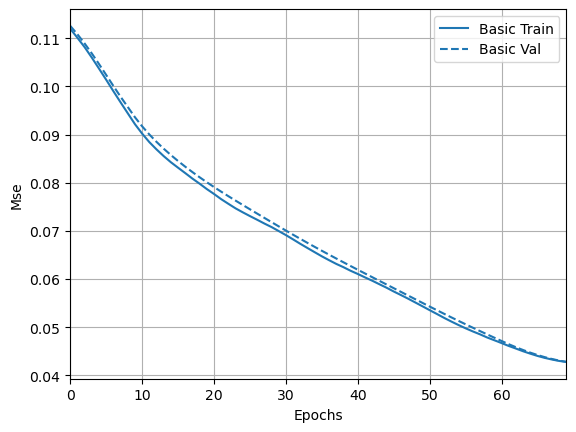

In [458]:
# plot the mse for each epoch
plotter.plot({'Basic': history}, metric = 'mse')

In [459]:
# evaluate on training data
loss, mae, mse = model.evaluate(X_train, y_train, verbose = 2)
print(f'Training set MAE: {mae}')
print(f'Training set MSE: {mse}')

89/89 - 0s - loss: 0.0406 - mae: 0.1144 - mse: 0.0406 - 133ms/epoch - 1ms/step
Training set MAE: 0.11443523317575455
Training set MSE: 0.04062880948185921


We see from this graph that our model is having problems when rating the best players. It follows the actual values closely for poorly rated players but deviates a lot for highly ranked players. This can be an issue with our model.

30/30 [==============================] - 0s 2ms/step


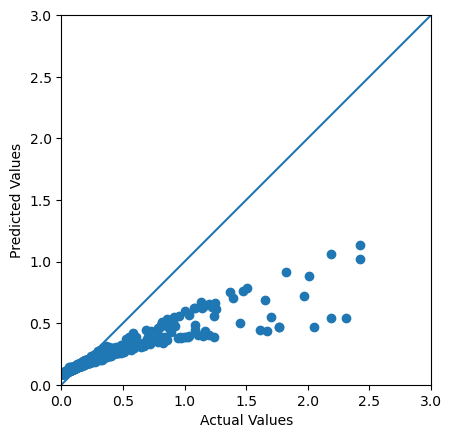

In [460]:
# graph of predictions vs actual for testing data
test_predictions = model.predict(X_test).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
lims = [0, 3]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

### Retired Defense Model

In [327]:
# retired defense
# split X and y for retired defense
X = retired_defense.drop(columns = ['rating', 'playerId', 'position', 'nameFull', 'age'],  axis = 1)
y = retired_defense['rating']

In [328]:
# train test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [329]:
# create path
checkpoint_path2 = r".\models\player_ranking2.ckpt"

In [330]:
# create checkpoint callback
ckpt_callback2 = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                  monitor = 'val_loss',
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  verbose = 0,
                                                  )

In [331]:
# train the model for retired defense
with tf.device('/CPU:0'):
    history = model.fit(
        X_train,
        y_train,
        batch_size = batch_size,
        epochs = epochs,
        verbose = 0,
        shuffle = True,
        steps_per_epoch = int(X_train.shape[0] / batch_size),
        validation_data = (X_valid, y_valid),
        callbacks = [tfdocs.modeling.EpochDots(),                 # for formatting
                    ckpt_callback2],                               # saves the best model and weights
    )


Epoch: 0, loss:0.0251,  mae:0.0849,  mse:0.0251,  val_loss:0.0311,  val_mae:0.0903,  val_mse:0.0311,  
......................................................................

In [332]:
# create dataframe of epoch statistics for retired defense
hist = pd.DataFrame(history.history)
hist

loss       mae       mse  val_loss   val_mae   val_mse
0   0.025082  0.084902  0.025082  0.031077  0.090350  0.031077
1   0.021707  0.081836  0.021707  0.030808  0.089314  0.030808
2   0.023049  0.082125  0.023049  0.030524  0.088416  0.030524
3   0.029520  0.086846  0.029520  0.030176  0.087748  0.030176
4   0.022323  0.079793  0.022323  0.029902  0.086812  0.029902
..       ...       ...       ...       ...       ...       ...
65  0.009793  0.047533  0.009793  0.015922  0.054886  0.015922
66  0.012664  0.051015  0.012664  0.015716  0.054702  0.015716
67  0.011632  0.049116  0.011632  0.015537  0.054274  0.015537
68  0.010264  0.046794  0.010264  0.015381  0.053683  0.015381
69  0.010521  0.048042  0.010521  0.015212  0.053396  0.015212

[70 rows x 6 columns]

In [333]:
# create data frame for actual
actual_predicted = pd.DataFrame(y_test)

In [334]:
actual_predicted

rating
5371   0.006465
5711   0.691156
6893   0.017874
8086   0.789263
7638   0.001711
...         ...
4539   0.001711
6261   0.127419
10493  0.142867
6860   0.014071
9847   0.001711

[527 rows x 1 columns]

In [335]:
# make predictions
results = model.predict(X_test)

17/17 [==============================] - 0s 2ms/step


In [336]:
# add predicted column
actual_predicted['predicted'] = results

In [337]:
actual_predicted

rating  predicted
5371   0.006465   0.036734
5711   0.691156   0.538625
6893   0.017874   0.049802
8086   0.789263   0.580733
7638   0.001711   0.032305
...         ...        ...
4539   0.001711   0.032305
6261   0.127419   0.164782
10493  0.142867   0.169835
6860   0.014071   0.045345
9847   0.001711   0.032305

[527 rows x 2 columns]

In [338]:
# merge
df_out = pd.merge(retired_defense,actual_predicted[['predicted']], how = 'left',left_index = True, right_index = True)

In [339]:
df_out

playerId         nameFull position  age  tackleType   passDef  \
839    19820086  Morten Andersen        K   63    0.000380  0.000000   
1434   19850016       Jerry Rice       WR   61    0.001711  0.000000   
1957   19860201        Ray Brown       OG   60    0.001711  0.000000   
2519   19880068         Tom Tupa        P   57    0.000761  0.000000   
2785   19880400     Jeff Feagles        P   57    0.001902  0.000000   
...         ...              ...      ...  ...         ...       ...   
11349  20070776     Stefan Logan       RB   42    0.007986  0.000000   
11354  20070988    Kenny Onatolu       LB   41    0.047918  0.028846   
13148  20100724      Kwaku Danso       DL   41    0.003423  0.000000   
13202  20100999      Chris Bryan        P   41    0.002282  0.000000   
16160  20140839      Chad Rempel       LS   41    0.002282  0.000000   

       sackType  int     qbHit    rating  predicted  
839    0.000000  0.0  0.000000  0.000380        NaN  
1434   0.000000  0.0  0.000000  0.001711        NaN  
1957   0.000000  0.0  0.000000  0.001711        NaN  
2519   0.000000  0.0  0.000000  0.000761        NaN  
2785   0.000000  0.0  0.000000  0.001902        NaN  
...         ...  ...       ...       ...        ...  
11349  0.000000  0.0  0.000000  0.007986        NaN  
11354  0.016854  0.0  0.018127  0.111745        NaN  
13148  0.000000  0.0  0.000000  0.003423        NaN  
13202  0.000000  0.0  0.000000  0.002282        NaN  
16160  0.000000  0.0  0.000000  0.002282   0.032655  

[2632 rows x 11 columns]

In [342]:
# optimal retired defense by model
optimal_retired_defense = df_out.sort_values('predicted', ascending = False)

In [343]:
# view players
optimal_retired_defense.head(n = 20)

playerId            nameFull position  age  tackleType   passDef  \
7734  20020452      James Harrison       LB   45    0.625024  0.129808   
8058  20030056       Osi Umenyiora       DE   41    0.379160  0.096154   
8778  20040098      Shaun Phillips       LB   42    0.448945  0.240385   
7015  20010064       Adrian Wilson        S   44    0.555239  0.346154   
5524  19970073        Jason Taylor       DE   49    0.354060  0.259615   
7548  20020128         Larry Foote       LB   43    0.572923  0.153846   
5141  19960026           Ray Lewis       LB   48    0.597642  0.211538   
6184  19990023    Antoine Winfield       DB   46    0.533371  0.298077   
9209  20040673         Tommy Kelly       DT   42    0.385625  0.086538   
6679  20000137       Clark Haggans       LB   46    0.347214  0.076923   
8013  20030011      Marcus Trufant       DB   42    0.465678  0.519231   
8561  20030700      Cullen Jenkins       DT   42    0.257654  0.096154   
6838  20000443         Paris Lenon       LB   45    0.527857  0.168269   
6597  20000055        Fred Robbins       DT   46    0.285606  0.139423   
7514  20020094          Chris Hope        S   43    0.500095  0.254808   
6197  19990036       Mike Peterson       LB   47    0.435254  0.139423   
6554  20000012         Shaun Ellis       DE   46    0.281612  0.052885   
8731  20040051        Dwan Edwards       DT   42    0.303860  0.076923   
9568  20050224         Jay Ratliff       DT   42    0.239209  0.052885   
9403  20050059  Jonathan Babineaux       DT   42    0.275338  0.096154   

      sackType   int     qbHit    rating  predicted  
7734  0.500000  0.16  0.604230  2.019061   1.466383  
8058  0.483146  0.00  0.564955  1.523414   1.208601  
8778  0.457865  0.12  0.335347  1.602542   1.104328  
7015  0.120787  0.38  0.132931  1.535110   0.958165  
5524  0.365169  0.08  0.268882  1.327726   0.916096  
7548  0.132022  0.14  0.138973  1.137764   0.894827  
5141  0.101124  0.22  0.087613  1.217917   0.888805  
6184  0.056180  0.40  0.048338  1.335966   0.868933  
9209  0.235955  0.00  0.299094  1.007212   0.864572  
6679  0.297753  0.02  0.205438  0.947328   0.836365  
8013  0.011236  0.44  0.006042  1.442187   0.820123  
8561  0.266854  0.00  0.335347  0.956009   0.797231  
6838  0.061798  0.16  0.069486  0.987410   0.776186  
6597  0.247191  0.06  0.250755  0.982975   0.771110  
7514  0.016854  0.28  0.018127  1.069884   0.753037  
6197  0.095506  0.22  0.060423  0.950606   0.748407  
6554  0.258427  0.00  0.217523  0.810447   0.743887  
8731  0.129213  0.14  0.229607  0.879604   0.712015  
9568  0.221910  0.00  0.250755  0.764759   0.689764  
9403  0.179775  0.08  0.199396  0.830662   0.686023

17/17 [==============================] - 0s 2ms/step


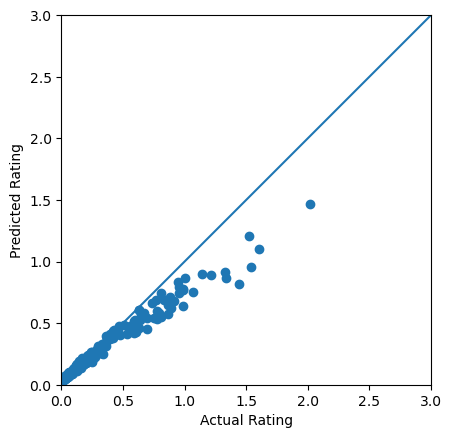

In [345]:
# plot of retired model
test_predictions = model.predict(X_test).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
lims = [0, 3]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Models for Special Teams

Now we will use the same function we made to create a model with two hidden layers but we will be using the data on our active special teams players.

In [368]:
# create X and y
X = active_special_teams.drop(columns = ['rating', 'playerId', 'position', 'nameFull', 'age'],  axis = 1)
y = active_special_teams['rating']

In [369]:
X.head()

kickRetYds  kickRetTd  kickNetYds  kickOutcome
8688    0.029523        0.0         0.0          0.0
8751    0.004920        0.0         0.0          0.0
9345    0.004920        0.0         0.0          0.0
9354    0.004920        0.0         0.0          0.0
9356    0.004920        0.0         0.0          0.0

In [370]:
# create X train y train splits and validation set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

We can also train a model using this syntax instead of our function. This model will still have an input layer, two hidden layers, and an output layer.

In [379]:
# creating the active special teams model
model = keras.models.Sequential([
    keras.layers.Dense(16, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1)
])

model.compile(loss = 'mean_squared_error', optimizer = 'sgd')
history = model.fit(X_train, y_train, epochs = 70, validation_data = (X_valid, y_valid))

Epoch 1/70
179/179 [==============================] - 2s 6ms/step - loss: 0.0035 - val_loss: 0.0079
Epoch 2/70
179/179 [==============================] - 1s 4ms/step - loss: 0.0033 - val_loss: 0.0075
Epoch 3/70
179/179 [==============================] - 1s 4ms/step - loss: 0.0031 - val_loss: 0.0072
Epoch 4/70
179/179 [==============================] - 1s 4ms/step - loss: 0.0030 - val_loss: 0.0070
Epoch 5/70
179/179 [==============================] - 1s 4ms/step - loss: 0.0029 - val_loss: 0.0068
Epoch 6/70
179/179 [==============================] - 1s 4ms/step - loss: 0.0028 - val_loss: 0.0066
Epoch 7/70
179/179 [==============================] - 1s 4ms/step - loss: 0.0027 - val_loss: 0.0064
Epoch 8/70
179/179 [==============================] - 1s 4ms/step - loss: 0.0026 - val_loss: 0.0062
Epoch 9/70
179/179 [==============================] - 1s 4ms/step - loss: 0.0025 - val_loss: 0.0061
Epoch 10/70
179/179 [==============================] - 1s 4ms/step - loss: 0.0025 - val_loss: 0.0060

In [380]:
# create dataframe of epoch statistics for active special teams
hist = pd.DataFrame(history.history)
hist

loss  val_loss
0   0.003545  0.007850
1   0.003282  0.007490
2   0.003116  0.007236
3   0.002997  0.006992
4   0.002885  0.006777
..       ...       ...
65  0.001046  0.002871
66  0.001030  0.002823
67  0.001012  0.002786
68  0.000994  0.002743
69  0.000977  0.002708

[70 rows x 2 columns]

In [381]:
# make predictions
results = model.predict(X_test)

60/60 [==============================] - 0s 2ms/step


In [382]:
# create dataframe for actual ratings
actual_predicted = pd.DataFrame(y_test)

In [383]:
# add prediction column 
actual_predicted['predicted'] = results

In [384]:
# merge with original data frame
df_out = pd.merge(active_special_teams,actual_predicted[['predicted']], how = 'left',left_index = True, right_index = True)

In [387]:
optimal_active_st = df_out.sort_values('predicted', ascending = False)

In [388]:
optimal_active_st.head(n = 15)

playerId               nameFull position  age  kickRetYds  kickRetTd  \
11787  20080571         Danny Amendola       WR   37    0.687637   0.142857   
13143  20100719          Brandon Banks       WR   35    0.470960   0.285714   
15255  20130583             Ryan Allen        P   33    0.004920   0.000000   
13878  20110819            Chris Jones        P   34    0.004920   0.000000   
12347  20090531            Tim Masthay        P   36    0.004920   0.000000   
14846  20130029  Cordarrelle Patterson       WR   32    0.427555   0.095238   
14972  20130155             Jeff Locke        P   34    0.004920   0.000000   
13102  20100678         Marcus Sherels       DB   36    0.430718   0.000000   
17351  20160228            Riley Dixon        P   30    0.004920   0.000000   
14127  20120100        Travis Benjamin       WR   33    0.153677   0.333333   
16526  20150184            Kaelin Clay       WR   31    0.143485   0.333333   
12606  20100036       Dexter McCluster       WR   35    0.264564   0.142857   
11716  20080500        Steven Hauschka        K   38    0.004920   0.000000   
10898  20070178              Nick Folk        K   38    0.004920   0.000000   
12504  20090688            Graham Gano        K   36    0.004920   0.000000   

       kickNetYds  kickOutcome    rating  predicted  
11787    0.000000     0.000000  0.830494   0.338670  
13143    0.000000     0.000000  0.756675   0.310964  
15255    0.382773     0.000000  0.387694   0.307272  
13878    0.360215     0.000000  0.365136   0.294602  
12347    0.351207     0.000000  0.356128   0.289449  
14846    0.000000     0.000000  0.522793   0.246710  
14972    0.261188     0.000000  0.266108   0.233510  
13102    0.000000     0.000000  0.430718   0.219639  
17351    0.237303     0.000000  0.242224   0.215128  
14127    0.000000     0.000000  0.487011   0.211127  
16526    0.000000     0.000000  0.476818   0.207959  
12606    0.000000     0.000000  0.407421   0.182654  
11716    0.000000     0.608247  0.613168   0.166192  
10898    0.000000     0.540501  0.545421   0.152693  
12504    0.004862     0.508837  0.518619   0.146147

### Retired Special Teams Model

In [389]:
# create X and y
X = retired_special_teams.drop(columns = ['rating', 'playerId', 'position', 'nameFull', 'age'],  axis = 1)
y = retired_special_teams['rating']

In [390]:
# create X train y train splits and validation set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [391]:
# retired special teams model
model = keras.models.Sequential([
    keras.layers.Dense(16, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1)
])

model.compile(loss = 'mean_squared_error', optimizer = 'sgd')
history = model.fit(X_train, y_train, epochs = 70, validation_data = (X_valid, y_valid))

Epoch 1/70
189/189 [==============================] - 2s 6ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 2/70
189/189 [==============================] - 1s 4ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 3/70
189/189 [==============================] - 1s 4ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 4/70
189/189 [==============================] - 1s 4ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 5/70
189/189 [==============================] - 1s 4ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 6/70
189/189 [==============================] - 1s 4ms/step - loss: 0.0027 - val_loss: 0.0016
Epoch 7/70
189/189 [==============================] - 1s 4ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 8/70
189/189 [==============================] - 1s 4ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 9/70
189/189 [==============================] - 1s 4ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 10/70
189/189 [==============================] - 1s 4ms/step - loss: 0.0025 - val_loss: 0.0014

In [392]:
# make predictions
results = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [393]:
# create dataframe for actual ratings
actual_predicted = pd.DataFrame(y_test)

In [394]:
# add prediction column 
actual_predicted['predicted'] = results

In [395]:
# merge with original data frame
df_out = pd.merge(retired_special_teams,actual_predicted[['predicted']], how = 'left',left_index = True, right_index = True)

In [396]:
optimal_retired_st = df_out.sort_values('predicted', ascending = False)

In [398]:
optimal_retired_og = df_out.sort_values('rating', ascending = False)

The two tables below shows the original data frame of the optimal starting team followed by the models version. Our results are good because the only player in the top 10 that was rated by both was rated as the highest player in our model. Since our model did not get the chance to see Leon Washington, he is not rated high, but the model did get the chance to be tested on Sam Koch and rated him first.

In [399]:
# original ratings
optimal_retired_og.head(n = 15)

playerId              nameFull position  age  kickRetYds  kickRetTd  \
10169  20060117       Leon Washington       RB   41    0.698445   0.619048   
8868   20040188              Andy Lee        P   41    0.004920   0.000000   
9443   20050099       Dustin Colquitt        P   41    0.004920   0.000000   
8904   20040224          Donnie Jones        P   43    0.004920   0.000000   
5420   19960452        Adam Vinatieri        K   50    0.004920   0.000000   
6684   20000142         Shane Lechler        P   47    0.004920   0.000000   
10255  20060203              Sam Koch        P   41    0.004920   0.000000   
6695   20000153            Dante Hall       WR   45    0.586855   0.238095   
9840   20050640          Robbie Gould        K   41    0.004920   0.000000   
6540   19990613           Matt Bryant       PK   48    0.004920   0.000000   
10012  20050815              Jon Ryan        P   41    0.004920   0.000000   
8113   20030111        Terrence McGee       DB   43    0.494245   0.238095   
6082   19980439           Phil Dawson        K   48    0.004920   0.000000   
7726   20020444        Eddie Drummond       WR   43    0.491257   0.190476   
6559   20000017  Sebastian Janikowski        K   45    0.004920   0.000000   

       kickNetYds  kickOutcome    rating  predicted  
10169    0.000000     0.000000  1.317492        NaN  
8868     1.000000     0.000000  1.004920        NaN  
9443     0.922906     0.000000  0.927826        NaN  
8904     0.902725     0.000000  0.907646        NaN  
5420     0.000366     0.885862  0.891148        NaN  
6684     0.870412     0.000000  0.875333        NaN  
10255    0.855429     0.000000  0.860350   0.370792  
6695     0.000000     0.000000  0.824951        NaN  
9840     0.000945     0.815906  0.821771        NaN  
6540     0.001920     0.768778  0.775619        NaN  
10012    0.748415     0.000000  0.753335        NaN  
8113     0.000000     0.000000  0.732340        NaN  
6082     0.002911     0.687040  0.694871        NaN  
7726     0.000000     0.000000  0.681734   0.216570  
6559     0.000457     0.669367  0.674744        NaN

In [397]:
# our models ratings
optimal_retired_st.head(n = 15)

playerId         nameFull position  age  kickRetYds  kickRetTd  \
10255  20060203         Sam Koch        P   41    0.004920   0.000000   
5718   19970426      David Akers        K   48    0.004920   0.000000   
9683   20050483      Chris Kluwe        P   41    0.004920   0.000000   
9391   20050047      Mike Nugent        K   41    0.004920   0.000000   
6932   20000538    Shayne Graham        K   45    0.004920   0.000000   
8745   20040065     Nate Kaeding        K   41    0.004920   0.000000   
7726   20020444   Eddie Drummond       WR   43    0.491257   0.190476   
7746   20020464        Jeff Reed        K   44    0.004920   0.000000   
3933   19920056     Jason Hanson        K   53    0.004920   0.000000   
9718   20050518       Nick Novak        K   42    0.004920   0.000000   
6475   19990460     Chris Hanson        P   47    0.004920   0.000000   
7677   20020257  Rock Cartwright       RB   43    0.330199   0.047619   
6389   19990228       Kris Brown        K   46    0.004920   0.000000   
8201   20030199    Willie Ponder       WR   43    0.336086   0.095238   
2425   19870400      John Carney        K   59    0.004920   0.000000   

       kickNetYds  kickOutcome    rating  predicted  
10255    0.855429     0.000000  0.860350   0.370792  
5718     0.001418     0.647275  0.653613   0.265596  
9683     0.486435     0.000000  0.491355   0.262056  
9391     0.001494     0.590574  0.596989   0.252537  
6932     0.000000     0.533137  0.538057   0.238676  
8745     0.000533     0.495582  0.501036   0.228799  
7726     0.000000     0.000000  0.681734   0.216570  
7746     0.000000     0.432990  0.437910   0.208257  
3933     0.001646     0.421208  0.427774   0.204177  
9718     0.003902     0.396171  0.404993   0.195498  
6475     0.308971     0.000000  0.313892   0.180334  
7677     0.000000     0.000000  0.377819   0.171501  
6389     0.000000     0.324006  0.328926   0.169178  
8201     0.000000     0.000000  0.431325   0.164640  
2425     0.000000     0.293814  0.298735   0.156564

## Offensive Models

Now we will build a model for the active offense and retired offense in the same fashion as we did above.

In [400]:
# create X and y
X = active_offense.drop(columns = ['rating', 'playerId', 'position', 'nameFull', 'age'],  axis = 1)
y = active_offense['rating']

In [401]:
# create X train y train splits and validation set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [402]:
# active offense model with 2 hidden layers
model = keras.models.Sequential([
    keras.layers.Dense(16, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1)
])

model.compile(loss = 'mean_squared_error', optimizer = 'sgd')
history = model.fit(X_train, y_train, epochs = 70, validation_data = (X_valid, y_valid))

Epoch 1/70
179/179 [==============================] - 1s 4ms/step - loss: 0.0190 - val_loss: 0.0233
Epoch 2/70
179/179 [==============================] - 1s 3ms/step - loss: 0.0170 - val_loss: 0.0216
Epoch 3/70
179/179 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 0.0204
Epoch 4/70
179/179 [==============================] - 0s 3ms/step - loss: 0.0148 - val_loss: 0.0194
Epoch 5/70
179/179 [==============================] - 1s 3ms/step - loss: 0.0140 - val_loss: 0.0185
Epoch 6/70
179/179 [==============================] - 1s 3ms/step - loss: 0.0133 - val_loss: 0.0177
Epoch 7/70
179/179 [==============================] - 1s 3ms/step - loss: 0.0126 - val_loss: 0.0169
Epoch 8/70
179/179 [==============================] - 0s 3ms/step - loss: 0.0119 - val_loss: 0.0161
Epoch 9/70
179/179 [==============================] - 1s 3ms/step - loss: 0.0112 - val_loss: 0.0153
Epoch 10/70
179/179 [==============================] - 1s 3ms/step - loss: 0.0105 - val_loss: 0.0146

In [403]:
# make predictions
results = model.predict(X_test)

60/60 [==============================] - 0s 2ms/step


In [404]:
# create dataframe for actual ratings
actual_predicted = pd.DataFrame(y_test)

In [405]:
# add prediction column 
actual_predicted['predicted'] = results

In [406]:
# merge with original data frame
df_out = pd.merge(active_offense,actual_predicted[['predicted']], how = 'left',left_index = True, right_index = True)

In [409]:
# original team
optimal_active_o = df_out.sort_values('rating', ascending = False)

In [410]:
optimal_active_o.head(n = 15)

playerId          nameFull position  age  recYards       rec  \
9369   20050024     Aaron Rodgers       QB   39  0.001552  0.000000   
12014  20090053      LeSean McCoy       RB   35  0.267257  0.458304   
11368  20080003         Matt Ryan       QB   38  0.001552  0.000000   
14104  20120075    Russell Wilson       QB   34  0.004483  0.002102   
14867  20130048      Le'Veon Bell       RB   31  0.373757  0.525578   
10734  20070012    Marshawn Lynch       RB   37  0.151445  0.215137   
13237  20110028       Mark Ingram       RB   33  0.149549  0.264891   
11383  20080018        Joe Flacco       QB   38  0.001552  0.000000   
13210  20110001        Cam Newton       QB   34  0.001552  0.000000   
12455  20090637      Arian Foster       RB   37  0.184666  0.241766   
11409  20080044        Matt Forte       RB   37  0.335364  0.465312   
11962  20090001  Matthew Stafford       QB   35  0.001552  0.000000   
13280  20110071    DeMarco Murray       RB   35  0.142824  0.242467   
9345   20050001        Alex Smith       QB   39  0.001552  0.000000   
10729  20070007   Adrian Peterson       RB   38  0.122708  0.161878   

       rushYards    rushTd  passYards  passComp    passTd    rating  predicted  
9369    0.215689  0.238532   0.765283  0.657324  0.764310  2.642690        NaN  
12014   0.929333  0.724771   0.000373  0.000000  0.000000  2.380037   1.997818  
11368   0.125042  0.018349   0.851317  0.709651  0.616162  2.322072        NaN  
14104   0.431244  0.440367   0.538370  0.413503  0.468013  2.298082        NaN  
14867   0.747234  0.633028   0.000373  0.000000  0.000000  2.279970   1.852866  
10734   0.848005  1.000000   0.000572  0.000138  0.001684  2.216981        NaN  
13237   0.680590  0.899083   0.000373  0.000000  0.000000  1.994486        NaN  
11383   0.063761  0.146789   0.654896  0.599337  0.447811  1.914146   1.360996  
13210   0.339792  0.357798   0.470253  0.377330  0.351852  1.898577        NaN  
12455   0.628897  0.770642   0.000497  0.000138  0.001684  1.828290        NaN  
11409   0.590345  0.431193   0.000373  0.000000  0.000000  1.822587        NaN  
11962   0.055582  0.082569   0.594309  0.549772  0.488215  1.771999        NaN  
13280   0.600670  0.660550   0.000621  0.000138  0.001684  1.648955        NaN  
9345    0.193698  0.082569   0.483400  0.501174  0.383838  1.646230        NaN  
10729   0.681864  0.642202   0.000373  0.000000  0.000000  1.609025        NaN

In [414]:
# the model's team
optimal_model_o = df_out.sort_values('predicted', ascending = False)
optimal_model_o.head(n = 15)

playerId         nameFull position  age  recYards       rec  rushYards  \
12014  20090053     LeSean McCoy       RB   35  0.267257  0.458304   0.929333   
14867  20130048     Le'Veon Bell       RB   31  0.373757  0.525578   0.747234   
15000  20130181  Latavius Murray       RB   33  0.098971  0.163280   0.456520   
11383  20080018       Joe Flacco       QB   38  0.001552  0.000000   0.063761   
17129  20160004  Ezekiel Elliott       RB   28  0.102937  0.136650   0.443111   
11389  20080024    Chris Johnson       RB   38  0.094316  0.180098   0.493932   
11789  20080571   Danny Amendola       WR   37  0.527789  0.641906   0.020650   
15658  20140063    Jarvis Landry       WR   30  0.526065  0.622985   0.004291   
14895  20130076     Keenan Allen       WR   31  0.600149  0.584443   0.008515   
17172  20160047   Michael Thomas       WR   29  0.540893  0.550105   0.002749   
11401  20080036     Jordy Nelson       WR   38  0.546641  0.518570   0.003956   
15602  20140007       Mike Evans       WR   30  0.595264  0.462509   0.003956   
10972  20070250   Ahmad Bradshaw       RB   37  0.127823  0.200420   0.394703   
10753  20070031       Greg Olsen       TE   38  0.481809  0.496847   0.003956   
14856  20130037  Giovani Bernard       RB   31  0.182252  0.281710   0.294737   

         rushTd  passYards  passComp    passTd    rating  predicted  
12014  0.724771   0.000373  0.000000  0.000000  2.380037   1.997818  
14867  0.633028   0.000373  0.000000  0.000000  2.279970   1.852866  
15000  0.559633   0.000373  0.000000  0.000000  1.278777   1.377995  
11383  0.146789   0.654896  0.599337  0.447811  1.914146   1.360996  
17129  0.513761   0.000373  0.000000  0.000000  1.196832   1.291764  
11389  0.440367   0.000373  0.000000  0.000000  1.209086   1.283385  
11789  0.000000   0.001441  0.000552  0.003367  1.195706   1.241948  
15658  0.000000   0.001590  0.000276  0.000000  1.155208   1.222519  
14895  0.000000   0.000373  0.000000  0.000000  1.193480   1.218238  
17172  0.000000   0.000373  0.000000  0.000000  1.094120   1.151258  
11401  0.000000   0.000373  0.000000  0.000000  1.069540   1.116878  
15602  0.000000   0.000373  0.000000  0.000000  1.062101   1.080657  
10972  0.321101   0.000373  0.000000  0.000000  1.044421   1.070390  
10753  0.000000   0.000373  0.000000  0.000000  0.982984   1.054098  
14856  0.238532   0.000373  0.000000  0.000000  0.997603   1.013306

60/60 [==============================] - 0s 2ms/step


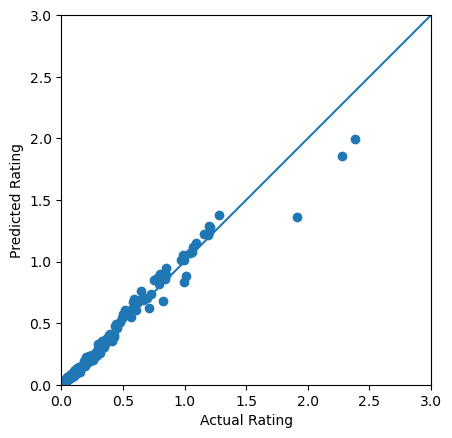

In [415]:
# plot of active offense
test_predictions = model.predict(X_test).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('Active Actual Rating')
plt.ylabel('Active Predicted Rating')
lims = [0, 3]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

### Retired Offense Model

In [416]:
# create X and y
X = retired_offense.drop(columns = ['rating', 'playerId', 'position', 'nameFull', 'age'],  axis = 1)
y = retired_offense['rating']

*We do not need to do this since we are setting our X and y for the retired offense but it helps me keep track of the steps that need to be done.*

In [417]:
# create X train y train splits and validation set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [418]:
# retired offense model with 2 hidden layers
model = keras.models.Sequential([
    keras.layers.Dense(16, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1)
])

model.compile(loss = 'mean_squared_error', optimizer = 'sgd')
history = model.fit(X_train, y_train, epochs = 70, validation_data = (X_valid, y_valid))

Epoch 1/70
189/189 [==============================] - 1s 2ms/step - loss: 0.0160 - val_loss: 0.0085
Epoch 2/70
189/189 [==============================] - 0s 1ms/step - loss: 0.0148 - val_loss: 0.0079
Epoch 3/70
189/189 [==============================] - 0s 1ms/step - loss: 0.0141 - val_loss: 0.0075
Epoch 4/70
189/189 [==============================] - 0s 1ms/step - loss: 0.0136 - val_loss: 0.0073
Epoch 5/70
189/189 [==============================] - 0s 1ms/step - loss: 0.0131 - val_loss: 0.0070
Epoch 6/70
189/189 [==============================] - 0s 1ms/step - loss: 0.0128 - val_loss: 0.0068
Epoch 7/70
189/189 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0066
Epoch 8/70
189/189 [==============================] - 0s 1ms/step - loss: 0.0121 - val_loss: 0.0064
Epoch 9/70
189/189 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0061
Epoch 10/70
189/189 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0059

In [419]:
# make predictions
results = model.predict(X_test)

63/63 [==============================] - 0s 943us/step


In [420]:
# create dataframe for actual ratings
actual_predicted = pd.DataFrame(y_test)

In [421]:
# add prediction column 
actual_predicted['predicted'] = results

In [422]:
# merge with original data frame
df_out = pd.merge(retired_offense,actual_predicted[['predicted']], how = 'left',left_index = True, right_index = True)

In [424]:
# original team
optimal_retired_o = df_out.sort_values('rating', ascending = False)
optimal_retired_o.head(n = 20)

playerId             nameFull position  age  recYards       rec  \
6983  20010032           Drew Brees       QB   44  0.005690  0.006307   
6741  20000199            Tom Brady       QB   46  0.001552  0.000000   
8691  20040011   Ben Roethlisberger       QB   41  0.001552  0.000000   
8684  20040004        Philip Rivers       QB   41  0.001552  0.000000   
8681  20040001          Eli Manning       QB   42  0.001552  0.000000   
5802  19980001       Peyton Manning       QB   47  0.001552  0.000000   
6956  20010005  LaDainian Tomlinson       RB   44  0.186218  0.299930   
8003  20030001        Carson Palmer       QB   43  0.001552  0.000000   
8071  20030069         Jason Witten       TE   41  0.749641  0.872460   
8542  20030681            Tony Romo       QB   43  0.001552  0.000000   
6952  20010001         Michael Vick       QB   43  0.000920  0.002102   
6981  20010030         Reggie Wayne       WR   44  0.752515  0.693763   
8005  20030003        Andre Johnson       WR   42  0.647796  0.634898   
6549  20000007         Thomas Jones       RB   45  0.086097  0.156272   
5988  19980187      Matt Hasselbeck       QB   48  0.001552  0.000000   
8056  20030054        Anquan Boldin       WR   43  0.629979  0.586545   
8429  20030566        Antonio Gates       TE   43  0.617909  0.597758   
7025  20010074          Steve Smith       WR   44  0.602448  0.550105   
7511  20020091      Brian Westbrook       RB   44  0.203288  0.266293   
8025  20030023       Willis McGahee       RB   42  0.066096  0.131745   

      rushYards    rushTd  passYards  passComp    passTd    rating  predicted  
6983   0.047536  0.183486   1.000000  1.000000  1.000000  3.243019        NaN  
6741   0.062823  0.146789   0.949155  0.943808  0.983165  3.087291        NaN  
8691   0.130540  0.174312   0.828504  0.754798  0.710438  2.600143        NaN  
8684   0.047335  0.036697   0.891029  0.766671  0.742424  2.485708        NaN  
8681   0.045659  0.082569   0.856163  0.772194  0.688552  2.446688        NaN  
5802   0.014549  0.082569   0.698161  0.675273  0.723906  2.196009        NaN  
6956   0.680389  1.000000   0.001267  0.000966  0.010101  2.178871        NaN  
8003   0.033657  0.018349   0.658623  0.606931  0.563973  1.883085   2.021952  
8071   0.003956  0.000000   0.000994  0.000138  0.000000  1.627188        NaN  
8542   0.047134  0.027523   0.551019  0.460997  0.468013  1.556238        NaN  
6952   0.404693  0.403670   0.219458  0.231672  0.213805  1.476320        NaN  
6981   0.003956  0.000000   0.000373  0.000000  0.000000  1.450606        NaN  
8005   0.008649  0.000000   0.000373  0.000000  0.000000  1.291716        NaN  
6549   0.564868  0.458716   0.000050  0.000138  0.000000  1.266140        NaN  
5988   0.052900  0.110092   0.347490  0.412536  0.331650  1.256219        NaN  
8056   0.011800  0.000000   0.000099  0.000138  0.000000  1.228562        NaN  
8429   0.003956  0.000000   0.000373  0.000000  0.000000  1.219995        NaN  
7025   0.019041  0.027523   0.000373  0.000000  0.000000  1.199490        NaN  
7511   0.383507  0.330275   0.000373  0.000000  0.000000  1.183735        NaN  
8025   0.435334  0.532110   0.000373  0.000000  0.000000  1.165657   1.123904

Just as before, we see that our model is performing well. The results are different because of the train test split we created so our model is not being tested on some of the original top players. Of the top players that our model is tested on like Carson Palmer and Willis McGahee, they are ranked at the top of our list.

In [425]:
# the model's team
optimal_model_o = df_out.sort_values('predicted', ascending = False)
optimal_model_o.head(n = 20)

playerId             nameFull position  age  recYards       rec  \
8003  20030001        Carson Palmer       QB   43  0.001552  0.000000   
8025  20030023       Willis McGahee       RB   42  0.066096  0.131745   
3542  19910033          Brett Favre       QB   54  0.003104  0.002102   
8834  20040154       Michael Turner       RB   41  0.030117  0.053959   
8029  20030027        Larry Johnson       RB   43  0.080752  0.102313   
7471  20020051       Clinton Portis       RB   42  0.072360  0.112123   
9370  20050025       Jason Campbell       QB   41  0.001552  0.000000   
7155  20010204  T.J. Houshmandzadeh       WR   46  0.367895  0.360897   
8761  20040081         Chris Cooley       TE   41  0.331743  0.360897   
6167  19990006           Torry Holt       WR   47  0.323984  0.292221   
8693  20040013            Lee Evans       WR   42  0.361285  0.266293   
7453  20020033        Jabar Gaffney       WR   42  0.310190  0.291521   
8687  20040007         Roy Williams       WR   41  0.338468  0.278206   
6982  20010031            Todd Heap       TE   43  0.279326  0.281009   
4819  19950005        Kerry Collins       QB   50  0.001552  0.000000   
9100  20040564         Malcom Floyd       WR   42  0.332031  0.236861   
6974  20010023     Deuce McAllister       RB   44  0.040749  0.072880   
7474  20020054       Maurice Morris       RB   43  0.060923  0.098108   
8095  20030093          Chris Brown       RB   42  0.042934  0.057463   
8709  20040029      Michael Jenkins       WR   41  0.217081  0.218641   

      rushYards    rushTd  passYards  passComp    passTd    rating  predicted  
8003   0.033657  0.018349   0.658623  0.606931  0.563973  1.883085   2.021952  
8025   0.435334  0.532110   0.000373  0.000000  0.000000  1.165657   1.123904  
3542   0.016426  0.009174   0.266501  0.364352  0.318182  0.979841   1.101418  
8834   0.459604  0.467890   0.000373  0.000000  0.000000  1.011943   1.071722  
8029   0.356956  0.477064   0.000472  0.000138  0.001684  1.019378   0.991702  
7471   0.392089  0.385321   0.000746  0.000414  0.005051  0.968104   0.966339  
9370   0.078646  0.091743   0.245378  0.246169  0.163300  0.826787   0.831121  
7155   0.013476  0.009174   0.000373  0.000000  0.000000  0.751815   0.795478  
8761   0.003956  0.000000   0.000373  0.000000  0.000000  0.696969   0.766094  
6167   0.004090  0.000000   0.000373  0.000000  0.000000  0.620668   0.656910  
8693   0.013610  0.000000   0.000373  0.000000  0.000000  0.641561   0.649877  
7453   0.006839  0.000000   0.000373  0.000000  0.000000  0.608922   0.648286  
8687   0.004224  0.000000   0.000373  0.000000  0.000000  0.621270   0.645315  
6982   0.003956  0.000000   0.000373  0.000000  0.000000  0.564664   0.609526  
4819   0.010124  0.009174   0.133822  0.199917  0.154882  0.509472   0.592236  
9100   0.003956  0.000000   0.000373  0.000000  0.000000  0.573220   0.576789  
6974   0.209521  0.238532   0.000373  0.000000  0.000000  0.562055   0.571675  
7474   0.215153  0.192661   0.000373  0.000000  0.000000  0.567217   0.558866  
8095   0.218371  0.165138   0.000373  0.000000  0.000000  0.484278   0.514059  
8709   0.004224  0.000000   0.000373  0.000000  0.000000  0.440319   0.473212

The following plot shows that this model performs the best out of all of our models since the predicted values fit very closely to the actual values.

63/63 [==============================] - 0s 845us/step


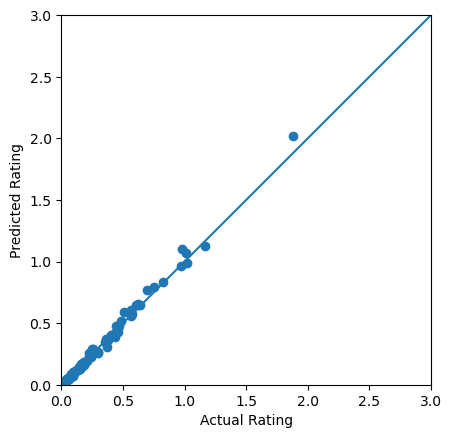

In [426]:
# plot of active offense
test_predictions = model.predict(X_test).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
lims = [0, 3]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Summary

We started this project with over 20 dataframes of players statistics and biographic information. We then broke each down into relevant features and performed feature engineering to create a target variable. This target variable was a sum of the players statistics for each phase of the game including offense, defense, and special teams. We then created data that split the players between active and retired based on their age. Those who are over 40 years old are deemed retired and those under 40 years old are active. We then created a regressional neural network with two hidden layers to predict the players ratings. Our results are strong and the optimal teams are very comparable. The differences we see in the teams occurs because we use a train test split for our model to learn from. Since our model learns on some of the optimal players, it is not tested on them so they will not appear in the predicted optimal team, but those that are listed in the optimal players pre-model and tested in the model both appear at the top of the optimal players list.

#### References

Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow.* Kiwisoft S.A.S.

Machine Learning and Data Science Learning. *Part 05 - Constructing a Neural Networks Models - Regression model with Python (TensorFlow & Keras). https://www.youtube.com/watch?v=2p-dM0czPEw

Steussie, T. *NFL play statistics (primary)*. Kaggle. https://www.kaggle.com/datasets/toddsteussie/nfl-play-statistics-dataset-2004-to-present

